<a href="https://colab.research.google.com/github/SandunGitHub/UOM_Research/blob/main/Feature_Engineering/Personal_Project_DFU_UOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading the dataset : Plantar_Thermogram_Database




 SECTION 01 : Catogorizing the severity of DFU within the Diabetic group

Importing all necessary libraries


In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import io
import PIL
import pickle
import csv

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
import xgboost as xgb
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the file using panndas library

In [ ]:
#loading the data of CG
#loading the data of DM
CG=pd.read_csv('/content/drive/MyDrive/Plantar_Thermogram_DB_CG.csv')
DM=pd.read_csv('/content/drive/MyDrive/Plantar_Thermogram_DB_DM.csv')
# LCA_ET = pd.read_csv('/content/sample_data/LCA_ET.csv',index_col=False)
# print(LCA_ET)

# print(DM)



printing the control group

In [ ]:
# print(CG)

Preprocessing or cleaning the data

In [ ]:
#height, weight and IMC  data of DM is missing
#repalcing them with their mean values
DM['Height (m)'] = DM['Height (m)'].fillna(DM['Height (m)'].mean())
DM[ 'Weight (Kg)'] = DM[ 'Weight (Kg)'].fillna(DM['Weight (Kg)'].mean())
DM['IMC'] = DM['IMC'].fillna(DM['IMC'].mean())

# # Adding a LCA_ET into dataframe
# DM.insert(4, 'LCA_ET', LCA_ET)
# print(DM)




(A) XGBoost, (B) Random Forest, and (C) Extra Tree  for feature selection and importance
As per the state of art, DFUs with people with DFUs are classified as follows
 [1].
Class 1 (TCI < 2)
Class 2 (2 < TCI < 3)
Class 3 (3 < TCI < 4)
Class 4 (4 < TCI < 5)
Class 5 (5 < TCI)


[1] Hernandez-Contreras, D.A.; Peregrina-Barreto, H.; de Jesus Rangel-Magdaleno, J.; Renero-Carrillo, F.J. Plantar thermogram
database for the study of diabetic foot complications. IEEE Access 2019, 7, 161296–161307.



In [ ]:
#avoiding duplicates and making a copy of the data frame
DM_ = DM.copy()
index_Class_5  =  DM_[(DM_['TCI_LF']> 5) | (DM_['TCI_RF']> 5)].index
DM_.drop(index_Class_5)
index_Class_4  =  DM_[(DM_['TCI_LF']< 5) & (DM_['TCI_LF']> 4) | (DM_['TCI_RF']< 5) & (DM_['TCI_RF']> 4)].index
DM_.drop(index_Class_4)
index_Class_3  =  DM_[(DM_['TCI_LF']< 4) & (DM_['TCI_LF']> 3) | (DM_['TCI_RF']< 3) & (DM_['TCI_RF']> 4)].index
DM_.drop(index_Class_3)
index_Class_2  =  DM_[(DM_['TCI_LF']< 3) & (DM_['TCI_LF']> 2) | (DM_['TCI_RF']< 3) & (DM_['TCI_RF']> 2)].index
DM_.drop(index_Class_2)
index_Class_1  =  DM_[(DM_['TCI_LF']< 2) | (DM_['TCI_RF']< 2)].index
DM_.drop(index_Class_1)
# DM.insert(loc=len(DM.columns), column='y',value=1, allow_duplicates=False)
DM['y'] = -1  # Initialize with a default label
DM.loc[index_Class_1, 'y'] = 0
DM.loc[index_Class_2, 'y'] = 1
DM.loc[index_Class_3, 'y'] = 2
DM.loc[index_Class_4, 'y'] = 3
DM.loc[index_Class_5, 'y'] = 4
DM = DM[DM['y'] != -1]


#Only thermal data is taken
DM = DM.drop(columns=['Subject','Gender','Weight (Kg)','Height (m)','IMC'])

Max_Temp_array = []
# np.max(DM.loc[121])
for person in range(len(DM)):
  Max_Temp = np.max(DM.loc[person])
  Max_Temp_array.append(Max_Temp)
  print(Max_Temp)

#inserting new array Maxium tempearture
DM.insert(loc=0, column='Max Temperature', value=Max_Temp_array)
#Normalized Range Tempearture
#Estimated Temperture Difference
#NRT Class I-V






55.0
60.0
66.0
57.0
40.0
44.0
62.0
50.0
50.0
68.0
33.0
67.0
57.0
63.0
52.0
52.0
50.0
50.0
73.0
57.0
70.0
69.0
50.0
60.0
63.0
56.0
51.0
57.0
70.0
46.0
76.0
45.0
57.0
32.11
50.0
52.0
63.0
62.0
67.0
52.0
65.0
53.0
46.0
36.0
62.0
63.0
52.0
76.0
28.47
53.0
54.0
66.0
64.0
44.0
51.0
52.0
83.0
53.0
53.0
59.0
56.0
46.0
66.0
35.61
48.0
53.0
53.0
61.0
53.0
66.0
62.0
61.0
37.0
76.0
62.0
59.0
63.0
60.0
56.0
40.0
68.0
64.0
51.0
51.0
44.0
62.0
43.0
52.0
57.0
51.0
57.0
49.0
56.0
72.0
72.0
55.0
49.0
74.0
56.0
61.0
52.0
70.0
56.0
47.0
54.0
53.0
75.0
84.0
45.0
46.0
50.0
53.0
55.0
55.0
46.0
56.0
65.0
58.0
58.0
54.0
39.0
48.0


Feature Importance and selection classification via XGBoost : Reproducing the results

210


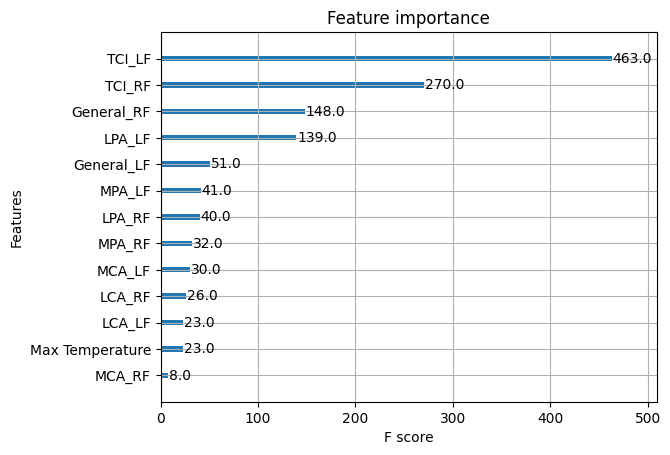

            Feature  Importance
8        General_LF    0.369065
13           TCI_LF    0.153704
7            TCI_RF    0.119833
2        General_RF    0.115000
10           LPA_LF    0.058968
12           MPA_LF    0.047260
4            LPA_RF    0.040849
3            LCA_RF    0.035155
6            MPA_RF    0.034000
0   Max Temperature    0.009936
5            MCA_RF    0.008702
9            LCA_LF    0.005017
11           MCA_LF    0.002509
1       Age (years)    0.000000


In [ ]:
from imblearn.over_sampling import RandomOverSampler
X = DM.iloc[:, :-1]
y = DM.iloc[:,-1]
#oversampling the data using smt and balacing the dataset
smt = SMOTE(sampling_strategy="all", random_state=42)
X_sm, Y_sm = smt.fit_resample(X, y)


#lebeling catogorical columns and balancing the data
categorical_cols = ['General_RF', 'Max Temperature', 'LCA_RF', 'LPA_RF', 'MCA_RF', 'MPA_RF', 'General_LF', 'LCA_LF', 'LPA_LF', 'MCA_LF', 'MPA_LF']
# X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_sm, Y_sm, test_size=0.2)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, y_train)

print(len(Y_train_sm))

# Train the XGBoost model
params = {
    'objective': 'multi:softmax',  # Change to your specific problem type
    'eval_metric': 'logloss',        # Change to your evaluation metric
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100
}

model = xgb.XGBClassifier(**params)
model.fit(X_train_sm, Y_train_sm)
y_pred = model.predict(X_train)

# Plot feature importance
plot_importance(model)
plt.show()

# Get feature importance scores
importance_scores = model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)
# The meaning of this?
# average_type = 'micro'  # Use 'micro', 'macro', or 'weighted' as need

# # Calculate metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average=average_type)
# recall = recall_score(y_test, y_pred, average=average_type)
# f1 = f1_score(y_test, y_pred, average=average_type)
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Calculate specificity from confusion matrix
# specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall (Sensitivity):", recall)
# print("F1-Score:", f1)
# print("Specificity:", specificity)

Feature Importance and selection classification via Random Forest : Reproducing the results

Feature Importance:
            Feature  Importance
13           TCI_LF    0.181846
8        General_LF    0.167127
7            TCI_RF    0.138646
2        General_RF    0.102181
10           LPA_LF    0.088147
4            LPA_RF    0.066632
6            MPA_RF    0.051048
9            LCA_LF    0.046504
12           MPA_LF    0.043941
11           MCA_LF    0.041234
3            LCA_RF    0.032246
5            MCA_RF    0.022323
0   Max Temperature    0.011448
1       Age (years)    0.006676


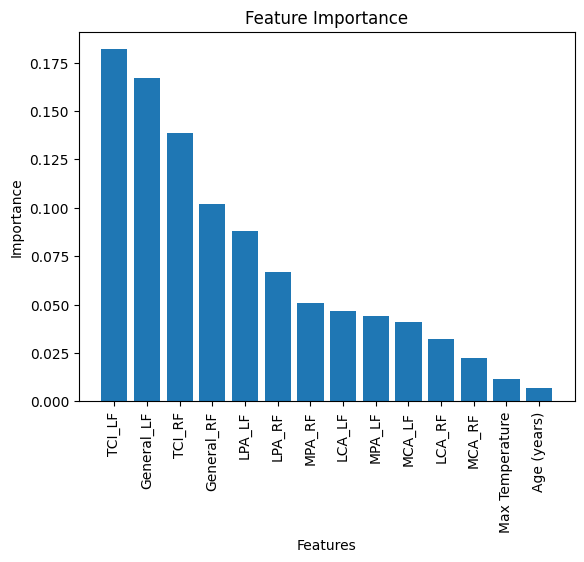

In [ ]:

X = DM.iloc[:, :-1]
y = DM.iloc[:,-1]
#oversampling the data using smt
smt = SMOTE(sampling_strategy="all", random_state=42)

#lebeling catogorical columns and balancing the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, y_train)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_sm, Y_train_sm)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

# Plot feature importances
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()
average_type = 'micro'  # Use 'micro', 'macro', or 'weighted' as need
# # Calculate metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average=average_type)
# recall = recall_score(y_test, y_pred, average=average_type)
# f1 = f1_score(y_test, y_pred, average=average_type)
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Calculate specificity from confusion matrix
# specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall (Sensitivity):", recall)
# print("F1-Score:", f1)
# print("Specificity:", specificity)

Feature importance and classification using Extra Tree classifier

In [ ]:
X = DM.iloc[:, :-1]
y = DM.iloc[:,-1]
#oversampling the data using smt
smt = SMOTE( sampling_strategy="all",random_state=42)

#lebeling catogorical columns and balancing the data
categorical_cols = ['TCI_LF','TCI_RF','General_RF', 'Max Temperature', 'LCA_RF', 'LPA_RF', 'MCA_RF', 'MPA_RF', 'General_LF', 'LCA_LF', 'LPA_LF', 'MCA_LF', 'MPA_LF']
# X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, y_train)

# Train an Extra Trees classifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train_sm, Y_train_sm)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

# # Select top features based on importance
# top_features = feature_importance_df['Feature'][:2]  # Change the number as needed
# X_train_selected = X_train[top_features]
# X_test_selected = X_test[top_features]

# # Train a classifier using the selected features
# classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
# classifier.fit(X_train_selected, y_train)

# # Predict using the trained classifier
# y_pred = classifier.predict(X_test_selected)

# # Calculate metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average=average_type)
# recall = recall_score(y_test, y_pred, average=average_type)
# f1 = f1_score(y_test, y_pred, average=average_type)
# conf_matrix = confusion_matrix(y_test, y_pred)
# average_type = 'micro'  # Use 'micro', 'macro', or 'weighted' as need
# # Calculate specificity from confusion matrix
# specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall (Sensitivity):", recall)
# print("F1-Score:", f1)
# print("Specificity:", specificity)





Feature Importance:
            Feature  Importance
13           TCI_LF    0.139220
7            TCI_RF    0.138603
8        General_LF    0.098066
2        General_RF    0.080628
10           LPA_LF    0.079486
12           MPA_LF    0.072781
6            MPA_RF    0.065941
9            LCA_LF    0.062252
4            LPA_RF    0.052893
3            LCA_RF    0.052010
5            MCA_RF    0.050835
11           MCA_LF    0.047153
0   Max Temperature    0.030170
1       Age (years)    0.029964


Contradictory to the results that we have seen from the journal paper, However both MLs result in same.  Using the combunation of feature selector and classifier


Using the images and 2D CNN to train both ptretrained networks and reproducing the results

In [ ]:
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have imported the necessary libraries and preprocessed your data
X = DM.iloc[:, :-1]
y = DM.iloc[:,-1]
#oversampling the data using smt
smt = SMOTE(random_state=42)

X_train_sm, Y_train_sm = smt.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# X_train_sm, Y_train_sm = smt.fit_resample(X_train, y_train)

# Perform feature selection using XGBoost
xgb_model_fs = XGBClassifier()
# xgb_model_fs.fit(X_train_sm, Y_train_sm)
xgb_model_fs.fit(X_train, y_train)


# Select features based on feature importance scores
feature_selector = SelectFromModel(xgb_model_fs, threshold=0.01, prefit=True)
# X_train_selected = feature_selector.transform(X_train_sm)
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)


# # # Plot feature importance
# # plot_importance(model)
# # plt.show()

# Get feature importance scores
importance_scores = xgb_model_fs.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)
# The meaning of this?
average_type = None  # Use 'micro', 'macro', or 'weighted' as need

# Train MLP classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
# mlp_model.fit(X_train_selected, Y_train_sm)
mlp_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = mlp_model.predict(X_test_selected)

# Evaluate the MLP model
accuracy = mlp_model.score(X_test_selected, y_test)
precision = precision_score(y_test, y_pred, average=average_type)
recall = recall_score(y_test, y_pred, average=average_type)
f1 = f1_score(y_test, y_pred, average=average_type)
conf_matrix = confusion_matrix(y_test, y_pred)
 # Calculate specificity from confusion matrix
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1-Score:", f1)
print("Specificity:", specificity)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=['0','1','2','3','4'])
print("Classification Report:")
print(report)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


            Feature  Importance
13           TCI_LF    0.358744
7            TCI_RF    0.170199
2        General_RF    0.131025
4            LPA_RF    0.108541
6            MPA_RF    0.089977
5            MCA_RF    0.039263
8        General_LF    0.038560
12           MPA_LF    0.038431
9            LCA_LF    0.013247
3            LCA_RF    0.004463
11           MCA_LF    0.003520
0   Max Temperature    0.003028
10           LPA_LF    0.001003
1       Age (years)    0.000000
Accuracy: 0.68
Precision: [1.         0.66666667 0.33333333 0.375      1.        ]
Recall (Sensitivity): [0.5        0.66666667 0.33333333 0.75       0.76923077]
F1-Score: [0.66666667 0.66666667 0.33333333 0.5        0.86956522]
Specificity: 0.5
Confusion Matrix:
[[ 1  1  0  0  0]
 [ 0  2  0  1  0]
 [ 0  0  1  2  0]
 [ 0  0  1  3  0]
 [ 0  0  1  2 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      0.67

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Lets check features inclded in the journal
Estimated Temperature (ET)
MCA_ET, LPA_ET, LCA_ET

and we need to get the data and trained the MLs sepeartly. The MCA_ET, LPA_ET and LCA_ET is close to the ones in the datasheet






In [ ]:
#lets get the ET
# ET is approximlatly equal to the temperture values in the paper
# ET values are totally different from the ones in the paper
# ET values have a very little impact as per all feature selection methods
# Classification accuracy does not even changes
# Lets increase the data
#loading the data of CG
#loading the data of DM
CG = pd.read_csv('/content/sample_data/Plantar_Thermogram_DB_CG.csv')
DM = pd.read_csv('/content/sample_data/Plantar_Thermogram_DB_DM.csv')









In [ ]:
#height, weight and IMC  data of DM is missing
#repalcing them with their mean values
DM['Height (m)'] = DM['Height (m)'].fillna(DM['Height (m)'].mean())
DM[ 'Weight (Kg)'] = DM[ 'Weight (Kg)'].fillna(DM['Weight (Kg)'].mean())
DM['IMC'] = DM['IMC'].fillna(DM['IMC'].mean())

# # Adding a LCA_ET into dataframe
# DM.insert(4, 'LCA_ET', LCA_ET)
# print(DM)


In [ ]:
DM1 = pd.DataFrame()
DM1.insert(0, 'General', DM['General_RF'])
DM1.insert(1,'LCA',DM['LCA_RF'])
DM1.insert(2,'LPA',DM['LPA_RF'])
DM1.insert(3,'MCA',DM['MCA_RF'])
DM1.insert(4,'MPA',DM['MPA_RF'])
DM1.insert(5,'TCI',DM['TCI_RF'])
DM2 = pd.DataFrame()
DM2.insert(0, 'General', DM['General_LF'])
DM2.insert(1,'LCA',DM['LCA_LF'])
DM2.insert(2,'LPA',DM['LPA_LF'])
DM2.insert(3,'MCA',DM['MCA_LF'])
DM2.insert(4,'MPA',DM['MPA_LF'])
DM2.insert(5,'TCI',DM['TCI_LF'])


DM3 = DM1.append(DM2, ignore_index=True)



<ipython-input-12-e7ef2a7ce518>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DM3 = DM1.append(DM2, ignore_index=True)


In [ ]:
#avoiding duplicates and making a copy of the data frame
DM3_ = DM3.copy()
index_Class_5  =  DM3_[(DM3_['TCI']>= 5)].index
DM3_.drop(index_Class_5)
index_Class_4  =  DM3_[(DM3_['TCI']< 5) & (DM3_['TCI']>= 4)].index
DM3_.drop(index_Class_4)
index_Class_3  =  DM3_[(DM3_['TCI']< 4) & (DM3_['TCI']>= 3)].index
DM3_.drop(index_Class_3)
index_Class_2  =  DM3_[(DM3_['TCI']< 3) & (DM3_['TCI']>= 2)].index
DM3_.drop(index_Class_2)
index_Class_1  =  DM3_[(DM3_['TCI']< 2)].index
DM3_.drop(index_Class_1)

# DM.insert(loc=len(DM.columns), column='y',value=1, allow_duplicates=False)
DM3['y'] = -1  # Initialize with a default label
DM3.loc[index_Class_1, 'y'] = 0
DM3.loc[index_Class_2, 'y'] = 1
DM3.loc[index_Class_3, 'y'] = 2
DM3.loc[index_Class_4, 'y'] = 3
DM3.loc[index_Class_5, 'y'] = 4
DM3 = DM3[DM3['y'] != -1]


Max_Temp_array_ = []


# DM3 = DM3.drop('TCI', axis=1)

# print(np.max(DM3.loc[38]))
for data in range(len(DM3)):
  Max_Temp_ = np.max(DM3.loc[data])
  Max_Temp_array_.append(Max_Temp_)
  print(Max_Temp_)

#inserting new array Maxium tempearture
DM3.insert(loc=0, column='Max Temperature', value=Max_Temp_array_)



244
32.79
27.38
29.06
32.61
24.52
33.42
29.79
32.37
30.06
35.01
32.03
32.48
29.01
32.78
34.26
33.0
32.11
30.41
31.71
30.4
31.22
31.67
30.4
29.41
32.89
33.0
32.95
25.71
28.21
29.53
31.34
34.14
25.43
31.5
29.97
33.31
24.86
31.01
31.45
32.87
31.96
31.5
30.58
26.51
30.81
32.38
33.81
31.4
28.47
32.44
29.01
29.54
27.5
29.22
32.0
29.66
27.82
24.2
32.92
32.4
26.86
28.56
32.25
35.61
22.47
27.18
30.45
35.49
30.99
30.4
27.89
30.02
30.2
31.45
32.21
33.88
33.41
32.18
27.84
30.08
28.78
35.19
31.92
30.6
23.61
29.23
31.48
33.07
33.73
26.31
34.02
35.91
34.87
26.64
27.46
26.74
31.69
31.15
29.52
30.85
25.48
28.54
31.97
28.92
25.33
31.56
29.82
29.12
33.95
25.31
30.56
26.34
27.8
29.96
31.82
32.65
25.74
32.56
33.43
33.44
33.81
27.34
32.39
26.75
27.9
31.04
25.72
33.82
27.92
30.56
30.55
34.58
32.14
32.92
28.12
32.17
34.21
33.27
31.9
27.63
32.24
30.19
29.91
31.21
31.41
33.2
33.03
32.54
32.35
24.43
29.77
28.78
32.27
32.51
25.28
32.11
31.79
32.75
24.61
31.09
31.1
32.25
32.24
31.39
32.14
27.32
30.25
30.19
33.41
3

365


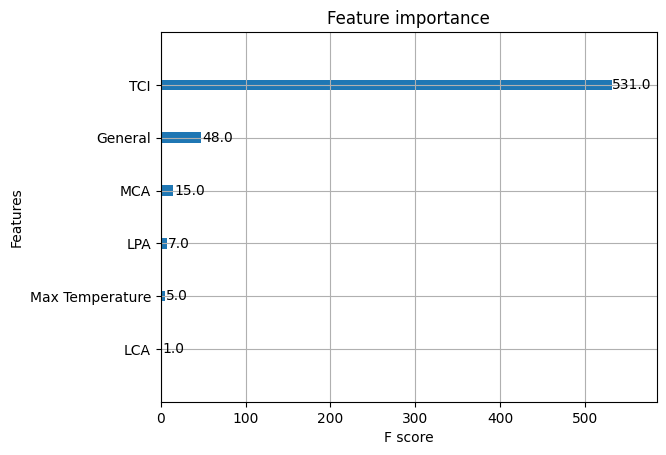

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X = DM3.iloc[:, :-1]
y = DM3.iloc[:,-1]
#oversampling the data using smt and balacing the dataset
smt = SMOTE(sampling_strategy="all", random_state=42)
X_sm, Y_sm = smt.fit_resample(X, y)


#lebeling catogorical columns and balancing the data
# X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_sm, Y_sm, test_size=0.2)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, y_train)

print(len(Y_train_sm))

# Train the XGBoost model
params = {
    'objective': 'multi:softmax',  # Change to your specific problem type
    'eval_metric': 'logloss',        # Change to your evaluation metric
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100
}

model = xgb.XGBClassifier(**params)
model.fit(X_train_sm, Y_train_sm)
y_pred = model.predict(X_train)

# Plot feature importance
plot_importance(model)
plt.show()

# Get feature importance scores
importance_scores = model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

Feature Importance:
           Feature  Importance
6              TCI    0.312940
1          General    0.269641
0  Max Temperature    0.126483
3              LPA    0.098297
2              LCA    0.079782
4              MCA    0.056937
5              MPA    0.055920


Text(0.5, 1.0, 'Feature Importance')

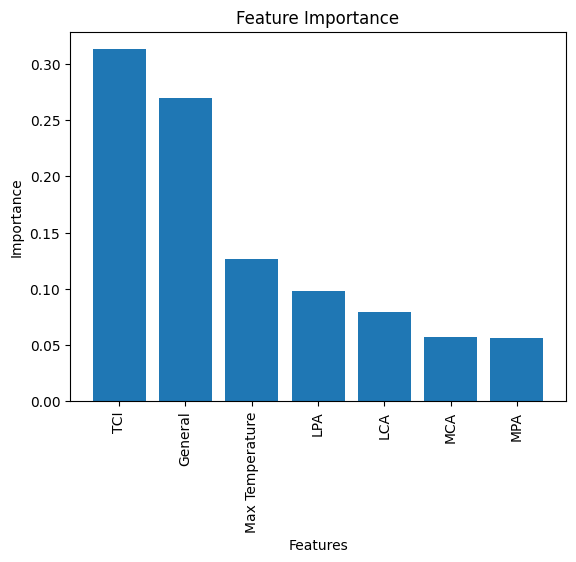

In [ ]:
X = DM3.iloc[:, :-1]
y = DM3.iloc[:,-1]
#oversampling the data using smt
smt = SMOTE(sampling_strategy="all", random_state=42)
X_sm, Y_sm = smt.fit_resample(X, y)

#lebeling catogorical columns and balancing the data

X_train, X_test, y_train, y_test = train_test_split(X_sm, Y_sm, test_size=0.2)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, y_train)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_sm, Y_train_sm)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

# Plot feature importances
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')

Use K- clusteruing algorithm to visualize the data

In [ ]:
pip install kmodes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1734.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1734.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1734.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1734.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1734.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1712.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 1688.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Ru

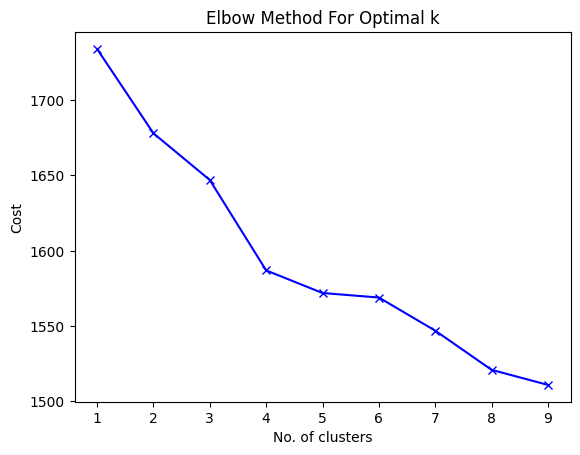

In [ ]:
#Using KNN agorithm to find out the optimum number of clusters
from kmodes.kmodes import KModes

# data =pd.read_csv('/content/drive/MyDrive/Plantar_Thermogram_DB_DM.csv')

cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(DM)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()


#Optimum Values is 5 as per the elbow method to find optimum K value
#Decided to proceed with aforementioned Classification via TCI value



In [ ]:
kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(DM)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 1613.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5, cost: 1589.0
Run 2, iteration: 2/100, moves: 0, cost: 1589.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 11, cost: 1577.0
Run 3, iteration: 2/100, moves: 0, cost: 1577.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3, cost: 1595.0
Run 4, iteration: 2/100, moves: 0, cost: 1595.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 7, cost: 1581.0
Run 5, iteration: 2/100, moves: 0, cost: 1581.0
Best run was number 3


array([0, 4, 2, 2, 4, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 1, 1,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 4, 1, 1, 0, 0, 0, 1, 4,
       1, 0, 0, 1, 4, 4, 0, 2, 4, 2, 0, 0, 0, 4, 0, 0, 4, 2, 0, 0, 0, 4,
       2, 0, 4, 0, 4, 0, 0, 1, 0, 0, 0, 0, 4, 2, 2, 0, 1, 0, 0, 1, 2, 0,
       2, 4, 2, 0, 0, 4, 4, 2, 0, 1, 2, 1, 0, 2, 1, 0, 4, 4, 4, 2, 0, 2,
       1, 4, 4, 0, 1, 0, 4, 0, 0, 0, 3, 4], dtype=uint16)

 SECTION 02 : Seperation of CG from DM

In [ ]:
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have imported the necessary libraries and preprocessed your data
X = DM3.iloc[:, :-1]
y = DM3.iloc[:,-1]
#oversampling the data using smt
smt = SMOTE(random_state=42)

X_train_sm, Y_train_sm = smt.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# X_train_sm, Y_train_sm = smt.fit_resample(X_train, y_train)

# Perform feature selection using XGBoost
xgb_model_fs = XGBClassifier()
# xgb_model_fs.fit(X_train_sm, Y_train_sm)
xgb_model_fs.fit(X_train, y_train)


# Select features based on feature importance scores
feature_selector = SelectFromModel(xgb_model_fs, threshold=0.01, prefit=True)
# X_train_selected = feature_selector.transform(X_train_sm)
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)


# # # Plot feature importance
# # plot_importance(model)
# # plt.show()

# Get feature importance scores
importance_scores = xgb_model_fs.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)
# The meaning of this?
average_type = None  # Use 'micro', 'macro', or 'weighted' as need

# Train MLP classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
# mlp_model.fit(X_train_selected, Y_train_sm)
mlp_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = mlp_model.predict(X_test_selected)

# Evaluate the MLP model
accuracy = mlp_model.score(X_test_selected, y_test)
precision = precision_score(y_test, y_pred, average=average_type)
recall = recall_score(y_test, y_pred, average=average_type)
f1 = f1_score(y_test, y_pred, average=average_type)
conf_matrix = confusion_matrix(y_test, y_pred)
 # Calculate specificity from confusion matrix
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1-Score:", f1)
print("Specificity:", specificity)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=['0','1','2','3','4'])
print("Classification Report:")
print(report)

NameError: ignored

Lets Catogorize the DM and CG, using the random tree classifie by considering the RF and LF

Acquiring the files from the left foot

In [ ]:

CG_directory_LPA_All = '/content/drive/MyDrive/Left_Foot_LPA/CG'
DM_directory_LPA_All = '/content/drive/MyDrive/Left_Foot_LPA/DM'
CG_directory_MPA_All = '/content/drive/MyDrive/Left_Foot_MPA/CG'
DM_directory_MPA_All = '/content/drive/MyDrive/Left_Foot_MPA/DM'
CG_directory_LCA_All = '/content/drive/MyDrive/Left_Foot_LCA/Left_Foot_LCA/CG'
DM_directory_LCA_All = '/content/drive/MyDrive/Left_Foot_LCA/Left_Foot_LCA/DM'
CG_directory_MCA_All = '/content/drive/MyDrive/Left_Foot_MCA/CG'
DM_directory_MCA_All = '/content/drive/MyDrive/Left_Foot_MCA/DM'
CG_directory_Left_All = '/content/drive/MyDrive/All_Foot/CG'
DM_directory_Left_All = '/content/drive/MyDrive/All_Foot/DM'


CG_directory_LPA_ALL_ = os.listdir(CG_directory_LPA_All)
DM_directory_LPA_ALL_ = os.listdir(DM_directory_LPA_All)
CG_directory_MPA_ALL_ = os.listdir(CG_directory_MPA_All)
DM_directory_MPA_ALL_ = os.listdir(DM_directory_MPA_All)
CG_directory_LCA_ALL_  = os.listdir(CG_directory_LCA_All)
DM_directory_LCA_ALL_ =  os.listdir(DM_directory_LCA_All)
CG_directory_MCA_ALL_  = os.listdir(CG_directory_MCA_All)
DM_directory_MCA_ALL_ =  os.listdir(DM_directory_MCA_All)
CG_directory_Left_All_Foot_  = os.listdir(CG_directory_Left_All)
DM_directory_Left_All_Foot_ =  os.listdir(DM_directory_Left_All)


CG_csv_files_LPA_L   = [filename for filename in CG_directory_LPA_ALL_ if '_L_' in filename and filename.endswith('.csv')]
DM_csv_files_LPA_L   = [filename for filename in DM_directory_LPA_ALL_ if '_L_' in filename and filename.endswith('.csv')]
CG_csv_files_MPA_L   = [filename for filename in CG_directory_MPA_ALL_ if 'L' in filename and filename.endswith('.csv')]
DM_csv_files_MPA_L   = [filename for filename in DM_directory_MPA_ALL_ if 'L' in filename and filename.endswith('.csv')]
CG_csv_files_LCA_L   = [filename for filename in CG_directory_LCA_ALL_ if '_L_' in filename and filename.endswith('.csv')]
DM_csv_files_LCA_L   = [filename for filename in DM_directory_LCA_ALL_ if '_L_' in filename and filename.endswith('.csv')]
CG_csv_files_MCA_L   = [filename for filename in CG_directory_MCA_ALL_ if 'L' in filename and filename.endswith('.csv')]
DM_csv_files_MCA_L   = [filename for filename in DM_directory_MCA_ALL_ if 'L' in filename and filename.endswith('.csv')]
CG_csv_files_ALL_L   = [filename for filename in CG_directory_Left_All_Foot_ if 'L' in filename and filename.endswith('.csv')]
DM_csv_files_ALL_L   = [filename for filename in DM_directory_Left_All_Foot_ if 'L' in filename and filename.endswith('.csv')]


CG_csv_files_LPA_R   = [filename for filename in CG_directory_LPA_ALL_ if '_R_' in filename and filename.endswith('.csv')]
DM_csv_files_LPA_R   = [filename for filename in DM_directory_LPA_ALL_ if '_R_' in filename and filename.endswith('.csv')]
CG_csv_files_MPA_R   = [filename for filename in CG_directory_MPA_ALL_ if 'R' in filename and filename.endswith('.csv')]
DM_csv_files_MPA_R   = [filename for filename in DM_directory_MPA_ALL_ if 'R' in filename and filename.endswith('.csv')]
CG_csv_files_LCA_R   = [filename for filename in CG_directory_LCA_ALL_ if '_R_' in filename and filename.endswith('.csv')]
DM_csv_files_LCA_R   = [filename for filename in DM_directory_LCA_ALL_ if '_R_' in filename and filename.endswith('.csv')]
CG_csv_files_MCA_R   = [filename for filename in CG_directory_MCA_ALL_ if 'R' in filename and filename.endswith('.csv')]
DM_csv_files_MCA_R   = [filename for filename in DM_directory_MCA_ALL_ if 'R' in filename and filename.endswith('.csv')]
CG_csv_files_ALL_R   = [filename for filename in CG_directory_Left_All_Foot_ if 'R' in filename and filename.endswith('.csv')]
DM_csv_files_ALL_R   = [filename for filename in DM_directory_Left_All_Foot_ if 'R' in filename and filename.endswith('.csv')]




CG = pd.read_csv('/content/drive/MyDrive/Plantar_Thermogram_DB_CG.csv')
DM = pd.read_csv('/content/drive/MyDrive/Plantar_Thermogram_DB_DM.csv')

Max_Temp_CG_Col_R = CG[['General_RF','LCA_RF','LPA_RF','MCA_RF','MPA_RF']]
Max_Temp_DM_Col_R = DM[['General_RF','LCA_RF','LPA_RF','MCA_RF','MPA_RF']]

Max_Temp_CG_Col_L = CG[['General_LF','LCA_LF','LPA_LF','MCA_LF','MPA_LF']]
Max_Temp_DM_Col_L = DM[['General_LF','LCA_LF','LPA_LF','MCA_LF','MPA_LF']]




Acquiring the files from the Right Foot

Calculation of the featutres and inserting them in our database
Estimtaed Difference, STD, Mean

In [ ]:
#height, weight and IMC  data of DM is missing
#repalcing them with their mean values
from typing import List
DM['Height (m)'] = DM['Height (m)'].fillna(DM['Height (m)'].mean())
DM[ 'Weight (Kg)'] = DM[ 'Weight (Kg)'].fillna(DM['Weight (Kg)'].mean())
DM['IMC'] = DM['IMC'].fillna(DM['IMC'].mean())
# # Adding a LCA_ET into dataframe
#adding extra freatures such as highest tempearture, Estimated Temperature, LPA_STD,  MPA_STD,  MCA_STD, LPA_ETD, LPS_ET, Fullfoot_ETD, LCA_ET, NRT (class 1 to class 5), MCA_HSE

Max_Temp_array_DM_L = []
Max_Temp_array_CG_L = []

#LPA
CG_LPA_L_Overall_Std_Dev = []
DM_LPA_L_Overall_Std_Dev =[]
CG_LPA_L_Average_Std_Dev = []
DM_LPA_L_Average_Std_Dev =[]
CG_LPA_L_Mean_Squared_Std_Dev = []
DM_LPA_L_Mean_Squared_Std_Dev =[]
CG_LCA_L_Overall_Std_Dev = []
DM_LCA_L_Overall_Std_Dev = []
CG_LCA_L_Average_Std_Dev = []
DM_LCA_L_Average_Std_Dev = []
CG_LCA_L_Mean_Squared_Std_Dev = []
DM_LCA_L_Mean_Squared_Std_Dev = []


CG_PCA_LPL_L_Dev =[]
DM_PCA_LPL_L_Dev = []
COMFIRM_ARRAY = []


#MPA
CG_MPA_L_Overall_Std_Dev = []
DM_MPA_L_Overall_Std_Dev =[]
CG_MPA_L_Average_Std_Dev = []
DM_MPA_L_Average_Std_Dev =[]
CG_MPA_L_Mean_Squared_Std_Dev = []
DM_MPA_L_Mean_Squared_Std_Dev =[]

#MCA
CG_MCA_L_Overall_Std_Dev = []
DM_MCA_L_Overall_Std_Dev =[]
CG_MCA_L_Average_Std_Dev = []
DM_MCA_L_Average_Std_Dev =[]
CG_MCA_L_Mean_Squared_Std_Dev = []
DM_MCA_L_Mean_Squared_Std_Dev =[]

#ALL_L
CG_ALL_L_Overall_Std_Dev = []
DM_ALL_L_Overall_Std_Dev =[]
CG_ALL_L_Average_Std_Dev = []
DM_ALL_L_Average_Std_Dev =[]
CG_ALL_L_Mean_Squared_Std_Dev = []
DM_ALL_L_Mean_Squared_Std_Dev =[]
CG_All_Mean = []
DM_All_Mean = []
CG_ET_ALL = []
DM_ET_ALL = []


DM_ = DM.copy()
CG_ = CG.copy()
DM_ = DM_.drop(columns=['Age (years)','Subject','Gender','Weight (Kg)','Height (m)','IMC'])
CG_ = CG_.drop(columns=['Age (years)','Subject','Gender','Weight (Kg)','Height (m)','IMC'])


#Estimated Temperatuture difference as per state of art
def Calculate_ET(CSV_FILE_SET,file_path,STORE_ARRAY,*args):

  custom_bin_list = []
  # custom_bin_list = list(kwargs.values())
  for custom_bin_data in args:
    custom_bin_list.append(custom_bin_data)

  for data_file in CSV_FILE_SET:
    csv_file_path = os.path.join(file_path, data_file)
    mat     = pd.read_csv(csv_file_path)
    mat_        = mat.values.flatten()
    filtered_data = mat_[(mat_ >= 26.5) & (mat_ <= 34.5)]
    hist, bin   = np.histogram(filtered_data, bins=custom_bin_list)
    total_pixels = np.sum(hist)
    percentage_per_bin = (hist / total_pixels) * 100
    last_index = len(percentage_per_bin)-1
    first_index = 0
    last_element = mat_[last_index]
    first_element = mat_[0]
    if last_index == np.argmax(percentage_per_bin):
        ET =  ((percentage_per_bin[np.argmax(percentage_per_bin)-1]* custom_bin_list[np.argmax(percentage_per_bin)-1])+(np.max(percentage_per_bin)* custom_bin_list[np.argmax(percentage_per_bin)]))\
          /(percentage_per_bin[np.argmax(percentage_per_bin)-1]+np.max(percentage_per_bin))
        STORE_ARRAY.append(ET)
    elif  first_index == np.argmax(percentage_per_bin):
        ET =  ((np.max(percentage_per_bin)* custom_bin_list[np.argmax(percentage_per_bin)])+ (percentage_per_bin[np.argmax(percentage_per_bin)+1]*(custom_bin_list[np.argmax(percentage_per_bin)+1])))\
          /(np.max(percentage_per_bin)+percentage_per_bin[np.argmax(percentage_per_bin)+1])
        STORE_ARRAY.append(ET)
    else:
        ET =  ((percentage_per_bin[np.argmax(percentage_per_bin)-1]* custom_bin_list[np.argmax(percentage_per_bin)-1])+(np.max(percentage_per_bin)* custom_bin_list[np.argmax(percentage_per_bin)])+ (percentage_per_bin[np.argmax(percentage_per_bin)+1]*( custom_bin_list[np.argmax(percentage_per_bin)+1])))\
          /(percentage_per_bin[np.argmax(percentage_per_bin)-1]+np.max(percentage_per_bin)+percentage_per_bin[np.argmax(percentage_per_bin)+1])
        STORE_ARRAY.append(ET)


#getting the standard deveiation of the LPA in the left foot
#standard deviation has the 2nd highest importance as per the random forest regerssion
# standard devaition : Overall Standard Deviation, Average Standard Deviation:, Global Variance or Mean Squared Deviation, Mean

def  overall_Mean(mat)->np.ndarray:
  mat = np.array(mat)
  mean = np.mean(mat)
  return mean

def  overall_std(mat)->np.ndarray:
  mat = np.array(mat)
  std = np.std(mat)
  return std

def Average_std(mat)->np.ndarray:
  mat = np.array(mat)
  mat_ = [np.std(mat) for data_set in mat]
  std = np.mean(mat_)
  return std


def Mean_Squared_std(mat)->np.ndarray:
  mat = np.array(mat)
  std = np.mean((mat - np.mean(mat)) ** 2)
  return std

def PCA_dev_std(mat)->np.ndarray:
  mat = np.array(mat)
  mean = np.mean(mat, axis=0)
  centered_matrix = mat - mean
  covariance_matrix = np.cov(centered_matrix, rowvar=False)
  eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
  sorted_indices = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[sorted_indices]
  total_eigenvalue_sum = np.sum(eigenvalues)
  variance_explained = eigenvalues / total_eigenvalue_sum
  cumulative_variance = np.cumsum(variance_explained)
  mean_cumulative_variance = np.mean(cumulative_variance)
  return  mean_cumulative_variance

def caculate_mean(CSV_FILE_SET,file_path,func,STORE_ARRAY):
  for data_file in CSV_FILE_SET:
    csv_file_path = os.path.join(file_path, data_file)
    mat     = pd.read_csv(csv_file_path)
    mat_    = overall_Mean(mat)
    STORE_ARRAY.append(mat_)

def calculate_std(CSV_FILE_SET,file_path,func,STORE_ARRAY):
  for data_file in CSV_FILE_SET:
    csv_file_path = os.path.join(file_path, data_file)
    mat     = pd.read_csv(csv_file_path)
    mat_    = mat.values.flatten()
    std_values = func(mat_)
    STORE_ARRAY.append(std_values)

def calculate_without_flatten_std(CSV_FILE_SET,file_path,func,STORE_ARRAY):
  for data_file in CSV_FILE_SET:
    csv_file_path = os.path.join(file_path, data_file)
    mat_     = pd.read_csv(csv_file_path)
    std_values = func(mat_)
    STORE_ARRAY.append(std_values)

#standard deviation of the LPA left foot
#Overall Standrd deviation
calculate_without_flatten_std(CG_csv_files_LPA_L,CG_directory_LPA_All,overall_std,CG_LPA_L_Overall_Std_Dev)
calculate_without_flatten_std(DM_csv_files_LPA_L ,DM_directory_LPA_All,overall_std,DM_LPA_L_Overall_Std_Dev)
#average standard deviation
calculate_std(CG_csv_files_LPA_L,CG_directory_LPA_All,Average_std,CG_LPA_L_Average_Std_Dev )
calculate_std(DM_csv_files_LPA_L,DM_directory_LPA_All,Average_std,DM_LPA_L_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_LPA_L,CG_directory_LPA_All,Mean_Squared_std,CG_LPA_L_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_LPA_L,DM_directory_LPA_All,Mean_Squared_std,DM_LPA_L_Mean_Squared_Std_Dev)

#standard deviation of the MPA left foot
#Overall Standrd deviation
calculate_std(CG_csv_files_MPA_L,CG_directory_MPA_All,overall_std,CG_MPA_L_Overall_Std_Dev)
calculate_std(DM_csv_files_MPA_L ,DM_directory_MPA_All,overall_std,DM_MPA_L_Overall_Std_Dev)
#average standard deviation
calculate_without_flatten_std(CG_csv_files_MPA_L,CG_directory_MPA_All,Average_std,CG_MPA_L_Average_Std_Dev )
calculate_without_flatten_std(DM_csv_files_MPA_L,DM_directory_MPA_All,Average_std,DM_MPA_L_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_MPA_L,CG_directory_MPA_All,Mean_Squared_std,CG_MPA_L_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_MPA_L,DM_directory_MPA_All,Mean_Squared_std,DM_MPA_L_Mean_Squared_Std_Dev)

#standard deviation of the LCA left foot
#Overall Standrd deviation
calculate_std(CG_csv_files_LCA_L,CG_directory_LCA_All,overall_std,CG_LCA_L_Overall_Std_Dev)
calculate_std(DM_csv_files_LCA_L ,DM_directory_LCA_All,overall_std,DM_LCA_L_Overall_Std_Dev)
#average standard deviation
calculate_without_flatten_std(CG_csv_files_LCA_L,CG_directory_LCA_All,Average_std,CG_LCA_L_Average_Std_Dev )
calculate_without_flatten_std(DM_csv_files_LCA_L,DM_directory_LCA_All,Average_std,DM_LCA_L_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_LCA_L,CG_directory_LCA_All,Mean_Squared_std,CG_LCA_L_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_LCA_L,DM_directory_LCA_All,Mean_Squared_std,DM_LCA_L_Mean_Squared_Std_Dev)

#standard deviation of the MCA left foot
#Overall Standrd deviation
calculate_std(CG_csv_files_MCA_L,CG_directory_MCA_All,overall_std,CG_MCA_L_Overall_Std_Dev)
calculate_std(DM_csv_files_MCA_L ,DM_directory_MCA_All,overall_std,DM_MCA_L_Overall_Std_Dev)
#average standard deviation
calculate_without_flatten_std(CG_csv_files_MCA_L,CG_directory_MCA_All,Average_std,CG_MCA_L_Average_Std_Dev )
calculate_without_flatten_std(DM_csv_files_MCA_L,DM_directory_MCA_All,Average_std,DM_MCA_L_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_MCA_L,CG_directory_MCA_All,Mean_Squared_std,CG_MCA_L_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_MCA_L,DM_directory_MCA_All,Mean_Squared_std,DM_MCA_L_Mean_Squared_Std_Dev)

#standard deviation of the ALL left foot
#Overall Standrd deviation
calculate_std(CG_csv_files_ALL_L,CG_directory_Left_All ,overall_std,CG_ALL_L_Overall_Std_Dev)
calculate_std(DM_csv_files_ALL_L,DM_directory_Left_All,overall_std,DM_ALL_L_Overall_Std_Dev)
#average standard deviation
calculate_without_flatten_std(CG_csv_files_ALL_L,CG_directory_Left_All,Average_std,CG_ALL_L_Average_Std_Dev )
calculate_without_flatten_std(DM_csv_files_ALL_L,DM_directory_Left_All,Average_std,DM_ALL_L_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_ALL_L,CG_directory_Left_All,Mean_Squared_std,CG_ALL_L_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_ALL_L,DM_directory_Left_All,Mean_Squared_std,DM_ALL_L_Mean_Squared_Std_Dev)
#Mean
caculate_mean(CG_csv_files_ALL_L,CG_directory_Left_All,overall_Mean,CG_All_Mean)
caculate_mean(DM_csv_files_ALL_L,DM_directory_Left_All,overall_Mean,DM_All_Mean)

#Estmatiin Temperature of the ALL left foot
Calculate_ET(CG_csv_files_ALL_L,CG_directory_Left_All,CG_ET_ALL,26.5, 28.5, 29.5, 30.5, 31, 32.5, 33.5, 34.5)
Calculate_ET(DM_csv_files_ALL_L,DM_directory_Left_All,DM_ET_ALL,26.5, 28.5, 29.5, 30.5, 31, 32.5, 33.5, 34.5)
# CG_ET_ALL.fillna(CG_ET_ALL.mean(), inplace=True)
# DM_ET_ALL.fillna(DM_ET_ALL.mean(), inplace=True)

# Estimated Temperature calculated for full foot only
CG_ET_ALL =  np.round(CG_ET_ALL, decimals=2)
CG_ET_ALL_mean  = np.nanmean(CG_ET_ALL, axis=0)
nan_indices = np.isnan(CG_ET_ALL)
CG_ET_ALL[nan_indices] = CG_ET_ALL_mean
CG_ET_ALL = list(CG_ET_ALL)
# ET_array , selected_data_lca
CG_ET_ALL = np.transpose([CG_ET_ALL])

# Estimated Temperature calculated for full foot only
DM_ET_ALL =  np.round(DM_ET_ALL, decimals=2)
DM_ET_ALL_mean  = np.nanmean(DM_ET_ALL, axis=0)
nan_indices = np.isnan(DM_ET_ALL)
DM_ET_ALL[nan_indices] = DM_ET_ALL_mean
DM_ET_ALL = list(DM_ET_ALL)
# ET_array , selected_data_lca
DM_ET_ALL = np.transpose([DM_ET_ALL])

#PCA based deviation of the LPA left foot
calculate_without_flatten_std(CG_csv_files_LPA_L,CG_directory_LPA_All,PCA_dev_std,CG_PCA_LPL_L_Dev)
calculate_without_flatten_std(DM_csv_files_LPA_L,DM_directory_LPA_All,PCA_dev_std,DM_PCA_LPL_L_Dev )



for data in range(len(Max_Temp_DM_Col_L)):
  Max_Temp_DM = np.max((Max_Temp_DM_Col_L.loc[data]))
  Max_Temp_array_DM_L.append(Max_Temp_DM)

for data_ in range(len(Max_Temp_CG_Col_L)):
  Max_Temp_CG = np.max(Max_Temp_CG_Col_L.loc[data_])
  Max_Temp_array_CG_L.append(Max_Temp_CG)





DM.insert(loc=0, column='Max Temperature', value=Max_Temp_array_DM_L)
CG.insert(loc=0, column='Max Temperature', value=Max_Temp_array_CG_L)

#inserting new arrays #error
DM.insert(loc=0, column='LPA Overall STD Left', value=DM_LPA_L_Overall_Std_Dev)
CG.insert(loc=0, column='LPA Overall STD Left', value=CG_LPA_L_Overall_Std_Dev)

#inserting new arrays #error
CG.insert(loc=0, column='LPA Average STD Left', value=CG_LPA_L_Average_Std_Dev)
DM.insert(loc=0, column='LPA Average STD Left', value=DM_LPA_L_Average_Std_Dev)

# #inserting new arrays
CG.insert(loc=0, column='LPA Mean Squared STD Left', value=CG_LPA_L_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='LPA Mean Squared STD Left', value=DM_LPA_L_Mean_Squared_Std_Dev)

# #inserting new arrays #error
CG.insert(loc=0, column='PCA LPA Left', value=CG_PCA_LPL_L_Dev)
DM.insert(loc=0, column='PCA LPA Left', value=DM_PCA_LPL_L_Dev)


# #inserting new arrays
CG.insert(loc=0, column='MPA Mean Squared STD Left', value=CG_MPA_L_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='MPA Mean Squared STD Left', value=DM_MPA_L_Mean_Squared_Std_Dev)

#inserting new arrays
DM.insert(loc=0, column='MPA Overall STD Left', value=DM_MPA_L_Overall_Std_Dev)
CG.insert(loc=0, column='MPA Overall STD Left', value=CG_MPA_L_Overall_Std_Dev)

#inserting new arrays
CG.insert(loc=0, column='MPA Average STD Left', value=CG_MPA_L_Average_Std_Dev)
DM.insert(loc=0, column='MPA Average STD Left', value=DM_MPA_L_Average_Std_Dev)

# #inserting new arrays
# #inserting new arrays
CG.insert(loc=0, column='LCA Mean Squared STD Left', value=CG_LCA_L_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='LCA Mean Squared STD Left', value=DM_LCA_L_Mean_Squared_Std_Dev)

#inserting new arrays
DM.insert(loc=0, column='LCA Overall STD Left', value=DM_LCA_L_Overall_Std_Dev)
CG.insert(loc=0, column='LCA Overall STD Left', value=CG_LCA_L_Overall_Std_Dev)


#inserting new arrays
CG.insert(loc=0, column='LCA Average STD Left', value=CG_LCA_L_Average_Std_Dev)
DM.insert(loc=0, column='LCA Average STD Left', value=DM_LCA_L_Average_Std_Dev)

# #inserting new arrays
#inserting new arrays
DM.insert(loc=0, column='MCA Overall STD Left', value=DM_MCA_L_Overall_Std_Dev)
CG.insert(loc=0, column='MCA Overall STD Left', value=CG_MCA_L_Overall_Std_Dev)

#inserting new arrays
CG.insert(loc=0, column='MCA Average STD Left', value=CG_MCA_L_Average_Std_Dev)
DM.insert(loc=0, column='MCA Average STD Left', value=DM_MCA_L_Average_Std_Dev)

# #inserting new arrays
CG.insert(loc=0, column='MCA Mean Squared STD Left', value=CG_MCA_L_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='MCA Mean Squared STD Left', value=DM_MCA_L_Mean_Squared_Std_Dev)

# #inserting new arrays
#inserting new arrays
DM.insert(loc=0, column='ALL Overall STD Left', value=DM_ALL_L_Overall_Std_Dev)
CG.insert(loc=0, column='ALL Overall STD Left', value=CG_ALL_L_Overall_Std_Dev)

#inserting new arrays
CG.insert(loc=0, column='ALL Average STD Left', value=CG_ALL_L_Average_Std_Dev)
DM.insert(loc=0, column='ALL Average STD Left', value=DM_ALL_L_Average_Std_Dev)

# #inserting new arrays
CG.insert(loc=0, column='ALL Mean Squared STD Left', value=CG_ALL_L_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='ALL Mean Squared STD Left', value=DM_ALL_L_Mean_Squared_Std_Dev)

# #inserting new arrays
CG.insert(loc=0, column='ALL Mean Left', value=CG_All_Mean)
DM.insert(loc=0, column='ALL Mean Left', value=DM_All_Mean)

# #inserting new arrays
CG.insert(loc=0, column='ET_ALL Left', value=CG_ET_ALL)
DM.insert(loc=0, column='ET_ALL Left', value=DM_ET_ALL)






<ipython-input-208-eaca086eb14b>:83: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100
<ipython-input-208-eaca086eb14b>:83: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100
<ipython-input-208-eaca086eb14b>:83: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100
<ipython-input-208-eaca086eb14b>:83: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100
<ipython-input-208-eaca086eb14b>:83: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100


In [ ]:
print(DM)
print(CG)


     ET_ALL Left  ALL Mean Left  ALL Mean Squared STD Left  \
0          32.05      23.595537                 214.116479   
1          27.63      21.076279                 151.876947   
2          31.27      23.591791                 193.379487   
3          26.50      18.530842                 127.640435   
4          29.51      21.145696                 189.354072   
..           ...            ...                        ...   
117        26.50      18.228930                 139.213485   
118        31.39      24.433705                 187.545859   
119        26.70      18.891327                 141.870474   
120        26.73      19.991836                 144.465466   
121        30.87      21.766545                 195.400632   

     ALL Average STD Left  ALL Overall STD Left  MCA Mean Squared STD Left  \
0               14.632719             14.632719                 102.877986   
1               12.323837             12.323837                  69.653934   
2               13.90

In [ ]:
#Max temp
Max_Temp_array_DM_R = []
Max_Temp_array_CG_R = []

#LPA
CG_LPA_R_Overall_Std_Dev = []
DM_LPA_R_Overall_Std_Dev =[]
CG_LPA_R_Average_Std_Dev = []
DM_LPA_R_Average_Std_Dev =[]
CG_LPA_R_Mean_Squared_Std_Dev = []
DM_LPA_R_Mean_Squared_Std_Dev =[]
CG_LCA_R_Overall_Std_Dev = []
DM_LCA_R_Overall_Std_Dev = []
CG_LCA_R_Average_Std_Dev = []
DM_LCA_R_Average_Std_Dev = []
CG_LCA_R_Mean_Squared_Std_Dev = []
DM_LCA_R_Mean_Squared_Std_Dev = []


CG_PCA_LPL_R_Dev =[]
DM_PCA_LPL_R_Dev = []
COMFIRM_ARRAY = []


#MPA
CG_MPA_R_Overall_Std_Dev = []
DM_MPA_R_Overall_Std_Dev =[]
CG_MPA_R_Average_Std_Dev = []
DM_MPA_R_Average_Std_Dev =[]
CG_MPA_R_Mean_Squared_Std_Dev = []
DM_MPA_R_Mean_Squared_Std_Dev =[]

#MCA
CG_MCA_R_Overall_Std_Dev = []
DM_MCA_R_Overall_Std_Dev =[]
CG_MCA_R_Average_Std_Dev = []
DM_MCA_R_Average_Std_Dev =[]
CG_MCA_R_Mean_Squared_Std_Dev = []
DM_MCA_R_Mean_Squared_Std_Dev =[]

#ALL_L
CG_ALL_R_Overall_Std_Dev = []
DM_ALL_R_Overall_Std_Dev =[]
CG_ALL_R_Average_Std_Dev = []
DM_ALL_R_Average_Std_Dev =[]
CG_ALL_R_Mean_Squared_Std_Dev = []
DM_ALL_R_Mean_Squared_Std_Dev =[]
CG_All_Mean_R = []
DM_All_Mean_R = []
CG_ET_ALL_R = []
DM_ET_ALL_R = []



#standard deviation of the LPA left foot
#Overall Standrd deviation
calculate_without_flatten_std(CG_csv_files_LPA_R,CG_directory_LPA_All,overall_std,CG_LPA_R_Overall_Std_Dev)
calculate_without_flatten_std(DM_csv_files_LPA_R ,DM_directory_LPA_All,overall_std,DM_LPA_R_Overall_Std_Dev)
#average standard deviation
calculate_std(CG_csv_files_LPA_R,CG_directory_LPA_All,Average_std,CG_LPA_R_Average_Std_Dev )
calculate_std(DM_csv_files_LPA_R,DM_directory_LPA_All,Average_std,DM_LPA_R_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_LPA_R,CG_directory_LPA_All,Mean_Squared_std,CG_LPA_R_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_LPA_R,DM_directory_LPA_All,Mean_Squared_std,DM_LPA_R_Mean_Squared_Std_Dev)

#standard deviation of the MPA left foot
#Overall Standrd deviation
calculate_std(CG_csv_files_MPA_R,CG_directory_MPA_All,overall_std,CG_MPA_R_Overall_Std_Dev)
calculate_std(DM_csv_files_MPA_R ,DM_directory_MPA_All,overall_std,DM_MPA_R_Overall_Std_Dev)
#average standard deviation
calculate_without_flatten_std(CG_csv_files_MPA_R,CG_directory_MPA_All,Average_std,CG_MPA_R_Average_Std_Dev )
calculate_without_flatten_std(DM_csv_files_MPA_R,DM_directory_MPA_All,Average_std,DM_MPA_R_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_MPA_R,CG_directory_MPA_All,Mean_Squared_std,CG_MPA_R_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_MPA_R,DM_directory_MPA_All,Mean_Squared_std,DM_MPA_R_Mean_Squared_Std_Dev)

#standard deviation of the LCA left foot
#Overall Standrd deviation
calculate_std(CG_csv_files_LCA_R,CG_directory_LCA_All,overall_std,CG_LCA_R_Overall_Std_Dev)
calculate_std(DM_csv_files_LCA_R ,DM_directory_LCA_All,overall_std,DM_LCA_R_Overall_Std_Dev)
#average standard deviation
calculate_without_flatten_std(CG_csv_files_LCA_R,CG_directory_LCA_All,Average_std,CG_LCA_R_Average_Std_Dev )
calculate_without_flatten_std(DM_csv_files_LCA_R,DM_directory_LCA_All,Average_std,DM_LCA_R_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_LCA_R,CG_directory_LCA_All,Mean_Squared_std,CG_LCA_R_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_LCA_R,DM_directory_LCA_All,Mean_Squared_std,DM_LCA_R_Mean_Squared_Std_Dev)

#standard deviation of the MCA left foot
#Overall Standrd deviation
calculate_std(CG_csv_files_MCA_R,CG_directory_MCA_All,overall_std,CG_MCA_R_Overall_Std_Dev)
calculate_std(DM_csv_files_MCA_R,DM_directory_MCA_All,overall_std,DM_MCA_R_Overall_Std_Dev)
#average standard deviation
calculate_without_flatten_std(CG_csv_files_MCA_R,CG_directory_MCA_All,Average_std,CG_MCA_R_Average_Std_Dev )
calculate_without_flatten_std(DM_csv_files_MCA_R,DM_directory_MCA_All,Average_std,DM_MCA_R_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_MCA_R,CG_directory_MCA_All,Mean_Squared_std,CG_MCA_R_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_MCA_R,DM_directory_MCA_All,Mean_Squared_std,DM_MCA_R_Mean_Squared_Std_Dev)

#standard deviation of the ALL left foot
#Overall Standrd deviation
calculate_std(CG_csv_files_ALL_R,CG_directory_Left_All ,overall_std,CG_ALL_R_Overall_Std_Dev)
calculate_std(DM_csv_files_ALL_R,DM_directory_Left_All,overall_std,DM_ALL_R_Overall_Std_Dev)
#average standard deviation
calculate_without_flatten_std(CG_csv_files_ALL_R,CG_directory_Left_All,Average_std,CG_ALL_R_Average_Std_Dev )
calculate_without_flatten_std(DM_csv_files_ALL_R,DM_directory_Left_All,Average_std,DM_ALL_R_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_ALL_R,CG_directory_Left_All,Mean_Squared_std,CG_ALL_R_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_ALL_R,DM_directory_Left_All,Mean_Squared_std,DM_ALL_R_Mean_Squared_Std_Dev)
#Mean
caculate_mean(CG_csv_files_ALL_R,CG_directory_Left_All,overall_Mean,CG_All_Mean_R)
caculate_mean(DM_csv_files_ALL_R,DM_directory_Left_All,overall_Mean,DM_All_Mean_R)

#Estmatiin Temperature of the ALL left foot
Calculate_ET(CG_csv_files_ALL_R,CG_directory_Left_All,CG_ET_ALL_R,26.5, 28.5, 29.5, 30.5, 31, 32.5, 33.5, 34.5)
Calculate_ET(DM_csv_files_ALL_R,DM_directory_Left_All,DM_ET_ALL_R,26.5, 28.5, 29.5, 30.5, 31, 32.5, 33.5, 34.5)
# CG_ET_ALL.fillna(CG_ET_ALL.mean(), inplace=True)
# DM_ET_ALL.fillna(DM_ET_ALL.mean(), inplace=True)

# Estimated Temperature calculated for full foot only
CG_ET_ALL_R =  np.round(CG_ET_ALL_R, decimals=2)
CG_ET_ALL_mean_R  = np.nanmean(CG_ET_ALL_R, axis=0)
nan_indices = np.isnan(CG_ET_ALL_R)
CG_ET_ALL_R[nan_indices] = CG_ET_ALL_mean_R
CG_ET_ALL_R = list(CG_ET_ALL_R)
# ET_array , selected_data_lca
CG_ET_ALL_R = np.transpose([CG_ET_ALL_R])

# Estimated Temperature calculated for full foot only
DM_ET_ALL_R =  np.round(DM_ET_ALL_R, decimals=2)
DM_ET_ALL_mean_R  = np.nanmean(DM_ET_ALL_R, axis=0)
nan_indices = np.isnan(DM_ET_ALL_R)
DM_ET_ALL_R[nan_indices] = DM_ET_ALL_mean_R
DM_ET_ALL_R = list(DM_ET_ALL_R)
# ET_array , selected_data_lca
DM_ET_ALL_R = np.transpose([DM_ET_ALL_R])

#PCA based deviation of the LPA left foot
calculate_without_flatten_std(CG_csv_files_LPA_L,CG_directory_LPA_All,PCA_dev_std,CG_PCA_LPL_R_Dev)
calculate_without_flatten_std(DM_csv_files_LPA_L,DM_directory_LPA_All,PCA_dev_std,DM_PCA_LPL_R_Dev )


for data in range(len(Max_Temp_DM_Col_R)):
  Max_Temp_DM = np.max(Max_Temp_DM_Col_R.loc[data])
  Max_Temp_array_DM_R.append(Max_Temp_DM)

for data_ in range(len(Max_Temp_CG_Col_R)):
  Max_Temp_CG = np.max(Max_Temp_CG_Col_R.loc[data_])
  Max_Temp_array_CG_R.append(Max_Temp_CG)


#inserting new arrays
DM.insert(loc=0, column='LPA Overall STD Right', value=DM_LPA_R_Overall_Std_Dev)
CG.insert(loc=0, column='LPA Overall STD Right', value=CG_LPA_R_Overall_Std_Dev)

#inserting new arrays
CG.insert(loc=0, column='LPA Average STD Right', value=CG_LPA_R_Average_Std_Dev)
DM.insert(loc=0, column='LPA Average STD Right', value=DM_LPA_R_Average_Std_Dev)

# #inserting new arrays
CG.insert(loc=0, column='LPA Mean Squared STD Right', value=CG_LPA_R_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='LPA Mean Squared STD Right', value=DM_LPA_R_Mean_Squared_Std_Dev)

# #inserting new arrays
CG.insert(loc=0, column='PCA LPA Right', value=CG_PCA_LPL_R_Dev)
DM.insert(loc=0, column='PCA LPA Right', value=DM_PCA_LPL_R_Dev)


# #inserting new arrays
CG.insert(loc=0, column='MPA Mean Squared STD Right', value=CG_MPA_R_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='MPA Mean Squared STD Right', value=DM_MPA_R_Mean_Squared_Std_Dev)

#inserting new arrays
DM.insert(loc=0, column='MPA Overall STD Right', value=DM_MPA_R_Overall_Std_Dev)
CG.insert(loc=0, column='MPA Overall STD Right', value=CG_MPA_R_Overall_Std_Dev)

#inserting new arrays
CG.insert(loc=0, column='MPA Average STD Right', value=CG_MPA_R_Average_Std_Dev)
DM.insert(loc=0, column='MPA Average STD Right', value=DM_MPA_R_Average_Std_Dev)

# #inserting new arrays
# #inserting new arrays
CG.insert(loc=0, column='LCA Mean Squared STD Right', value=CG_LCA_R_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='LCA Mean Squared STD Right', value=DM_LCA_R_Mean_Squared_Std_Dev)

#inserting new arrays
DM.insert(loc=0, column='LCA Overall STD Right', value=DM_LCA_R_Overall_Std_Dev)
CG.insert(loc=0, column='LCA Overall STD Right', value=CG_LCA_R_Overall_Std_Dev)

#inserting new arrays
CG.insert(loc=0, column='LCA Average STD Right', value=CG_LCA_R_Average_Std_Dev)
DM.insert(loc=0, column='LCA Average STD Right', value=DM_LCA_R_Average_Std_Dev)

# #inserting new arrays
#inserting new arrays
DM.insert(loc=0, column='MCA Overall STD Right', value=DM_MCA_R_Overall_Std_Dev)
CG.insert(loc=0, column='MCA Overall STD Right', value=CG_MCA_R_Overall_Std_Dev)

#inserting new arrays
CG.insert(loc=0, column='MCA Average STD Right', value=CG_MCA_R_Average_Std_Dev)
DM.insert(loc=0, column='MCA Average STD Right', value=DM_MCA_R_Average_Std_Dev)

# #inserting new arrays
CG.insert(loc=0, column='MCA Mean Squared STD Right', value=CG_MCA_R_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='MCA Mean Squared STD Right', value=DM_MCA_R_Mean_Squared_Std_Dev)

# #inserting new arrays
#inserting new arrays
DM.insert(loc=0, column='ALL Overall STD Right', value=DM_ALL_R_Overall_Std_Dev)
CG.insert(loc=0, column='ALL Overall STD Right', value=CG_ALL_R_Overall_Std_Dev)

#inserting new arrays
CG.insert(loc=0, column='ALL Average STD Right', value=CG_ALL_R_Average_Std_Dev)
DM.insert(loc=0, column='ALL Average STD Right', value=DM_ALL_R_Average_Std_Dev)

# #inserting new arrays
CG.insert(loc=0, column='ALL Mean Squared STD Right', value=CG_ALL_R_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='ALL Mean Squared STD Right', value=DM_ALL_R_Mean_Squared_Std_Dev)

# #inserting new arrays
CG.insert(loc=0, column='ALL Mean Right', value=CG_All_Mean_R)
DM.insert(loc=0, column='ALL Mean Right', value=DM_All_Mean_R)

# #inserting new arrays
CG.insert(loc=0, column='ET_ALL Right', value=CG_ET_ALL_R)
DM.insert(loc=0, column='ET_ALL Right', value=DM_ET_ALL_R)


<ipython-input-208-eaca086eb14b>:83: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100
<ipython-input-208-eaca086eb14b>:83: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100
<ipython-input-208-eaca086eb14b>:83: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100
<ipython-input-208-eaca086eb14b>:83: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100


In [ ]:

print(CG)
print(DM)

    ET_ALL Right  ALL Mean Right  ALL Mean Squared STD Right  \
0      26.690000       18.144551                  142.430437   
1      27.000000       20.978079                  148.855933   
2      28.660000       21.470497                  175.440592   
3      26.940000       20.100525                  158.154510   
4      26.980000       19.301007                  135.324290   
5      26.990000       18.469022                  150.389946   
6      27.050000       19.251867                  134.871052   
7      26.500000       17.112539                  126.378907   
8      27.170000       18.498077                  118.598642   
9      27.170000       19.780753                  144.388360   
10     26.870000       18.567727                  144.121860   
11     27.200000       19.435621                  167.585457   
12     26.880000       19.077020                  140.373806   
13     27.270000       21.971442                  144.477511   
14     28.440000       20.810929        

Application to Right Leg

Utilizing the binary classification to label the DM and CG

In [ ]:
DM['y'] = 1
CG['y'] = 0


combining the DM and CG data together and performing a random shuffling






In [ ]:
All = DM.append(CG, ignore_index=True)
print(All)


     ET_ALL Right  ALL Mean Right  ALL Mean Squared STD Right  \
0       31.640000       25.351164                  180.907898   
1       26.800000       19.081112                  152.195880   
2       27.130000       21.129945                  146.891773   
3       31.530000       22.660763                  219.319292   
4       32.360000       24.524480                  209.181919   
..            ...             ...                         ...   
162     26.820000       20.020939                  142.855923   
163     26.500000       18.725789                  130.806741   
164     26.500000       18.359122                  122.944573   
165     27.076136       16.479916                   99.396635   
166     29.180000       21.799749                  158.737776   

     ALL Average STD Right  ALL Overall STD Right  MCA Mean Squared STD Right  \
0                13.450201              13.450201                   95.301183   
1                12.336769              12.336769        

<ipython-input-213-77bee56d7643>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  All = DM.append(CG, ignore_index=True)


In [ ]:
# print(All["PCA LPA Left"])
# print(All["PCA LPA Left"])
# print(All["ALL Overall STD left"])

0      0.988822
1      0.988492
2      0.988986
3      0.990848
4      0.988953
         ...   
162    0.988843
163    0.988879
164    0.990909
165    0.989811
166    0.987878
Name: PCA LPA Left, Length: 167, dtype: float64
0      0.988822
1      0.988492
2      0.988986
3      0.990848
4      0.988953
         ...   
162    0.988843
163    0.988879
164    0.990909
165    0.989811
166    0.987878
Name: PCA LPA Left, Length: 167, dtype: float64


KeyError: ignored

performing random shuffle




In [ ]:
All_ = All.sample(frac=1, random_state=42)
print(All_)

     ET_ALL Right  ALL Mean Right  ALL Mean Squared STD Right  \
101     26.500000       18.302855                  103.953171   
108     26.500000       19.767834                  112.581649   
78      27.330000       22.348826                  174.194116   
56      29.568319       16.626672                   82.480176   
98      29.350000       22.377123                  160.881992   
..            ...             ...                         ...   
71      27.330000       22.042737                  154.271306   
106     29.550000       21.615068                  186.968899   
14      32.080000       23.022115                  225.070629   
92      26.500000       19.083787                  115.993697   
102     29.450000       21.528534                  142.244336   

     ALL Average STD Right  ALL Overall STD Right  MCA Mean Squared STD Right  \
101              10.195743              10.195743                  113.863207   
108              10.610450              10.610450        

Droping the unwanted columns like patient number

In [ ]:

All_ = All_.drop(columns=['Subject','Gender'])


In [ ]:
indices_with_nan = All_.index[All_.isna().any(axis=1)]

print(indices_with_nan)



Int64Index([], dtype='int64')


resampling via SMOTE to balance the data set

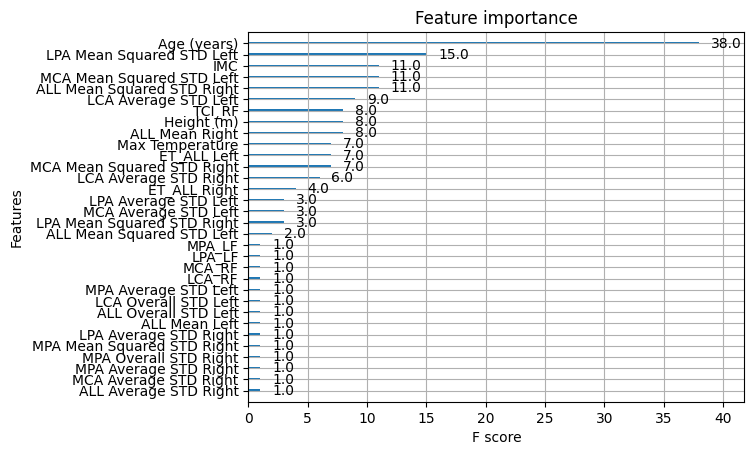

In [ ]:
X = All_.iloc[:, :-1]
y = All_.iloc[:,-1]
#oversampling the data using smt
smt = SMOTE(sampling_strategy="all", random_state=42)


#lebeling catogorical columns and balancing the data
# X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, y_train)



# Train the XGBoost model
params = {
    'objective': 'binary:logistic',  # Change to your specific problem type
    'eval_metric': 'logloss',        # Change to your evaluation metric
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'learning_rate':0.1,
    'min_child_weight':1,
    'gamma':0,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'nthread':4,
    'scale_pos_weight':1,
    'seed':42
}

model = xgb.XGBClassifier(**params)
model.fit(X_train_sm, Y_train_sm)
y_pred = model.predict(X_train)

# Plot feature importance
plot_importance(model)
plt.show()

# Get feature importance scores
importance_scores = model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

  Random Tree Classifier for the feature Classification

Feature Importance:
                       Feature  Importance
37                 Age (years)    0.186005
43                      LPA_RF    0.052451
36             Max Temperature    0.043742
49                      LPA_LF    0.043282
0                 ET_ALL Right    0.041918
51                      MPA_LF    0.037479
33   LPA Mean Squared STD Left    0.036533
41                  General_RF    0.034883
47                  General_LF    0.027445
34        LPA Average STD Left    0.027399
18                 ET_ALL Left    0.027302
45                      MPA_RF    0.027035
46                      TCI_RF    0.026265
2   ALL Mean Squared STD Right    0.025352
30        MPA Overall STD Left    0.025212
15  LPA Mean Squared STD Right    0.023389
27        LCA Overall STD Left    0.022917
21        ALL Average STD Left    0.021951
28   LCA Mean Squared STD Left    0.021567
3        ALL Average STD Right    0.018456
35        LPA Overall STD Left    0.017194
52                      TCI_LF    

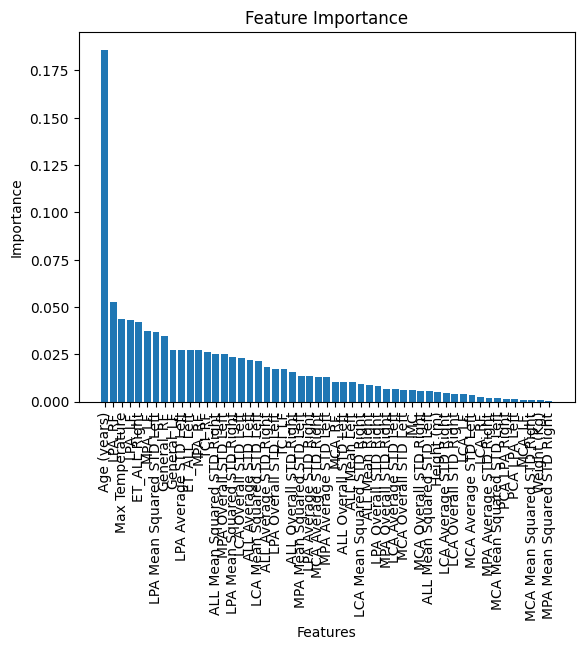

In [ ]:
X = All_.iloc[:, :-1]
y = All_.iloc[:,-1]
#oversampling the data using smt
smt = SMOTE(sampling_strategy="all", random_state=42)

#lebeling catogorical columns and balancing the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, y_train)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_sm, Y_train_sm)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

# Plot feature importances
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

Extra Tree Classifier for ghe classification

In [ ]:
X = All_.iloc[:, :-1]
y = All_.iloc[:,-1]
#oversampling the data using smt
smt = SMOTE( sampling_strategy="all",random_state=42)

#lebeling catogorical columns and balancing the data
categorical_cols = ['TCI_LF','TCI_RF','General_RF', 'Max Temperature', 'LCA_RF', 'LPA_RF', 'MCA_RF', 'MPA_RF', 'General_LF', 'LCA_LF', 'LPA_LF', 'MCA_LF', 'MPA_LF']
# X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, y_train)

# Train an Extra Trees classifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train_sm, Y_train_sm)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)
accuracy_values = []



Feature Importance:
                       Feature  Importance
37                 Age (years)    0.126146
18                 ET_ALL Left    0.052530
0                 ET_ALL Right    0.047559
34        LPA Average STD Left    0.032468
33   LPA Mean Squared STD Left    0.031704
52                      TCI_LF    0.031495
47                  General_LF    0.024934
19               ALL Mean Left    0.024584
51                      MPA_LF    0.024477
17       LPA Overall STD Right    0.024196
49                      LPA_LF    0.023748
8        LCA Average STD Right    0.023061
30        MPA Overall STD Left    0.021891
36             Max Temperature    0.021212
21        ALL Average STD Left    0.020645
35        LPA Overall STD Left    0.020433
1               ALL Mean Right    0.020278
16       LPA Average STD Right    0.019499
9        LCA Overall STD Right    0.019494
29        MPA Average STD Left    0.018939
2   ALL Mean Squared STD Right    0.018638
46                      TCI_RF    

 Age has the highest importance in the classification between DM from CG

In [ ]:
# XGB boost with the MLP Classifier

from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import csv
import time


start_time = time.time()
# Assuming you have imported the necessary libraries and preprocessed your data
X = All_.iloc[:, :-1]
y = All_.iloc[:,-1]
#oversampling the data using smt
smt = SMOTE(sampling_strategy='auto',random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, y_train)

# Perform feature selection using XGBoost
xgb_model_fs = XGBClassifier()
# xgb_model_fs.fit(X_train_sm, Y_train_sm)
xgb_model_fs.fit(X_train_sm, Y_train_sm)


# Select features based on feature importance scores
feature_selector = SelectFromModel(xgb_model_fs, threshold=0.05, prefit=True) # Change of the ineterval
# X_train_selected = feature_selector.transform(X_train_sm)
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)


# # # Plot feature importance
# # plot_importance(model)
# # plt.show()

# Get feature importance scores
importance_scores = xgb_model_fs.feature_importances_
print(importance_scores )

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)
# The meaning of this?
average_type = 'macro'  # Use 'micro', 'macro', or 'weighted' as need

# Train MLP classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
# mlp_model.fit(X_train_selected, Y_train_sm)
mlp_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = mlp_model.predict(X_test_selected)

# Evaluate the MLP model
accuracy = mlp_model.score(X_test_selected, y_test)
precision = precision_score(y_test, y_pred, average=average_type)
recall = recall_score(y_test, y_pred, average=average_type)
f1 = f1_score(y_test, y_pred, average=average_type)
conf_matrix = confusion_matrix(y_test, y_pred)
 # Calculate specificity from confusion matrix
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])


end_time = time.time()
elapsed_time = end_time - start_time

try:
    existing_data = pd.read_csv('/content/drive/MyDrive/accuracy_values.csv')
except FileNotFoundError:
    existing_data = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1','specificity','sensitivity','Inference Time'])  # Create a new DataFrame if file doesn't exist

# Append the new accuracy value to the DataFrame
new_row = pd.DataFrame({'Accuracy': [accuracy],'Precision': [precision],'Recall': [recall],'F1': [f1], 'specificity':[specificity],'sensitivity':[sensitivity],'Inference Time':[elapsed_time]})
updated_data = pd.concat([existing_data, new_row], ignore_index=True)

print("Accuracy:", accuracy)
updated_data.to_csv('/content/drive/MyDrive/accuracy_values.csv', index=False)

print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1-Score:", f1)
print("Specificity:", specificity)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=['0','1'])
print("Classification Report:")
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


[0.029648   0.03419589 0.0488438  0.         0.         0.00455377
 0.         0.         0.01683195 0.         0.         0.03534734
 0.         0.         0.00319771 0.         0.         0.
 0.18270136 0.01126296 0.00414033 0.         0.         0.01210235
 0.         0.         0.0090865  0.         0.         0.01383903
 0.         0.         0.         0.05373099 0.         0.
 0.         0.31589827 0.         0.01975236 0.03446735 0.
 0.         0.         0.03789085 0.         0.00645963 0.
 0.         0.05337686 0.         0.         0.07267262]
                       Feature  Importance
37                 Age (years)    0.315898
18                 ET_ALL Left    0.182701
52                      TCI_LF    0.072673
33   LPA Mean Squared STD Left    0.053731
49                      LPA_LF    0.053377
2   ALL Mean Squared STD Right    0.048844
44                      MCA_RF    0.037891
11       MPA Average STD Right    0.035347
40                         IMC    0.034467
1        

In [ ]:
# Ranodom Forest features selestor with Adaboost Classifier
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

# Load the dataset (you can replace this with your dataset)
start_time = time.time()
X = All_.iloc[:, :-1]
y = All_.iloc[:,-1]
#oversampling the data using smt
smt = SMOTE(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, y_train)


model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_sm, Y_train_sm)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # You can select a threshold to keep only the most important features
# threshold = 0
# # selected_features = X_train[:, important_features>important_features]

feature_mask = feature_importance_df[feature_importance_df['Importance'] >= 0.05]
selected_features_ = feature_mask['Feature']

# # Index the feature importances and the DataFrame using the mask
# # selected_importances = important_features[feature_mask]
# # print(selected_importances)
selected_features =  X_train.loc[:,selected_features_ ]
print(selected_features_)


# # AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier.fit(selected_features.values, y_train)

# # Use the same feature selection on the test set
selected_features_test = X_test.loc[:, selected_features_]

# feature_mask_test = important_features >= threshold

# Index the feature importances and the DataFrame using the mask
# selected_importances_test = important_features[feature_mask_test]
# selected_features =  X_train.loc[:,feature_mask_test ]

# # Predict using the AdaBoost classifier
y_pred = adaboost_classifier.predict(selected_features_test.values)

# # Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=average_type)
recall = recall_score(y_test, y_pred, average=average_type)
f1 = f1_score(y_test, y_pred, average=average_type)
conf_matrix = confusion_matrix(y_test, y_pred)
 # Calculate specificity from confusion matrix
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])

end_time = time.time()
elapsed_time = end_time - start_time

try:
    existing_data = pd.read_csv('/content/drive/MyDrive/RFClassifierAdaboostClassifier_values.csv')
except FileNotFoundError:
    existing_data = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1','specificity','sensitivity','Inference Time'])  # Create a new DataFrame if file doesn't exist

# Append the new accuracy value to the DataFrame
new_row = pd.DataFrame({'Accuracy': [accuracy],'Precision': [precision],'Recall': [recall],'F1': [f1], 'specificity':[specificity],'sensitivity':[sensitivity],'Inference Time':[elapsed_time]})
updated_data = pd.concat([existing_data, new_row], ignore_index=True)

updated_data.to_csv('/content/drive/MyDrive/RFClassifierAdaboostClassifier_values.csv', index=False)


print(f"Accuracy:= {accuracy}")
print(f"Precision:= {precision}")
print(f"Recall:= {recall}")
print(f"F1:= {f1}")
print(f"specificity:= {specificity}")
print(f"Elapsed Time:'{elapsed_time}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=['0','1'])
print("Classification Report:")
print(report)






37             Age (years)
0             ET_ALL Right
51                  MPA_LF
34    LPA Average STD Left
Name: Feature, dtype: object
Accuracy:= 0.9117647058823529
Precision:= 0.9083333333333333
Recall:= 0.8873517786561265
F1:= 0.8966565349544073
specificity:= 0.8181818181818182
Elapsed Time:'0.3027019500732422
Confusion Matrix:
[[ 9  2]
 [ 1 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.92      0.96      0.94        23

    accuracy                           0.91        34
   macro avg       0.91      0.89      0.90        34
weighted avg       0.91      0.91      0.91        34



In [ ]:
# Extra Tree feature selector with Adaboost feature classifier
# Extra Tree Feature selector
from sklearn.datasets import load_iris
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset (you can replace this with your dataset)
# Load the dataset (you can replace this with your dataset)
start_time = time.time()
X = All_.iloc[:, :-1]
y = All_.iloc[:,-1]
#oversampling the data using smt
smt = SMOTE(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, y_train)


# Feature selection using ExtraTreesClassifier
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train_sm, Y_train_sm)

# Select important features based on feature importances
threshold = 0.05  # Adjust as needed
# selected_features = X_train[:, extra_trees.feature_importances_ > threshold]

# Get feature importances
feature_importances = model.feature_importances_


# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_mask = feature_importance_df[feature_importance_df['Importance'] >= 0.05]
selected_features_ = feature_mask['Feature']
selected_features =  X_train.loc[:,selected_features_ ]

# # AdaBoost classifier
# # AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier.fit(selected_features.values, y_train)

# # Use the same feature selection on the test set
selected_features_test = X_test.loc[:, selected_features_]
print(selected_features)

# feature_mask_test = important_features >= threshold

# Index the feature importances and the DataFrame using the mask
# selected_importances_test = important_features[feature_mask_test]
# selected_features =  X_train.loc[:,feature_mask_test ]

# # Predict using the AdaBoost classifier
y_pred = adaboost_classifier.predict(selected_features_test.values)

# # Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=average_type)
recall = recall_score(y_test, y_pred, average=average_type)
f1 = f1_score(y_test, y_pred, average=average_type)
conf_matrix = confusion_matrix(y_test, y_pred)
 # Calculate specificity from confusion matrix
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])

end_time = time.time()
elapsed_time = end_time - start_time

try:
    existing_data = pd.read_csv('/content/drive/MyDrive/ExtraTreeAdaboostClassifier_values.csv')
except FileNotFoundError:
    existing_data = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1','specificity','sensitivity','Inference Time'])  # Create a new DataFrame if file doesn't exist

# Append the new accuracy value to the DataFrame
new_row = pd.DataFrame({'Accuracy': [accuracy],'Precision': [precision],'Recall': [recall],'F1': [f1], 'specificity':[specificity],'sensitivity':[sensitivity],'Inference Time':[elapsed_time]})
updated_data = pd.concat([existing_data, new_row], ignore_index=True)

updated_data.to_csv('/content/drive/MyDrive/ExtraTreeAdaboostClassifier_values.csv', index=False)


print(f"Accuracy:= {accuracy}")
print(f"Precision:= {precision}")
print(f"Recall:= {recall}")
print(f"F1:= {f1}")
print(f"specificity:= {specificity}")
print(f"Elapsed Time:={elapsed_time}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=['0','1'])
print("Classification Report:")
print(report)










     Age (years)  Max Temperature
2             66            27.90
60            56            27.01
10            33            32.14
141           31            24.14
49            53            32.51
..           ...              ...
99            61            30.87
22            50            31.41
42            46            32.14
132           37            26.16
15            52            33.27

[133 rows x 2 columns]
Accuracy:= 0.9117647058823529
Precision:= 0.8928571428571428
Recall:= 0.9347826086956521
F1:= 0.9051162790697674
specificity:= 1.0
Elapsed Time:=0.7168960571289062
Confusion Matrix:
[[11  0]
 [ 3 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.87      0.93        23

    accuracy                           0.91        34
   macro avg       0.89      0.93      0.91        34
weighted avg       0.93      0.91      0.91        34



Plotting the ROC curve
1. XGBoost feature selector and MLP as the classifier.
2. Adaboost feature selector and Extra tree as the classifier
3. Adaboost feature selector and Random Forest as the classifier






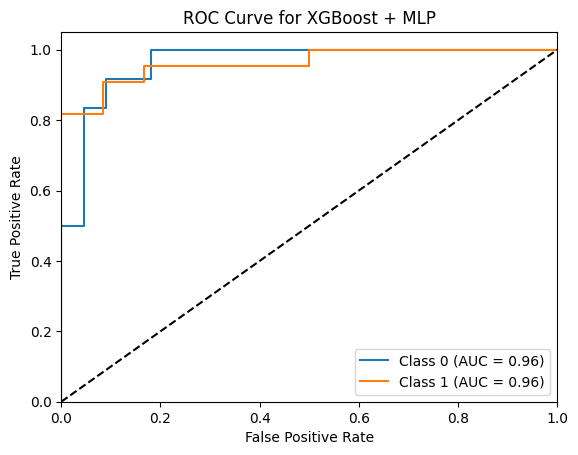

Classifier: XGBoost + MLP
Accuracy: 0.9117647058823529
Precision: 0.8928571428571428
Sensitivity (Recall): 0.8695652173913043
F1-Score: 0.9051162790697674
Specificity: 1.0
AUC: {0: 0.962121212121212, 1: 0.9621212121212122}
---------------------------------------------------


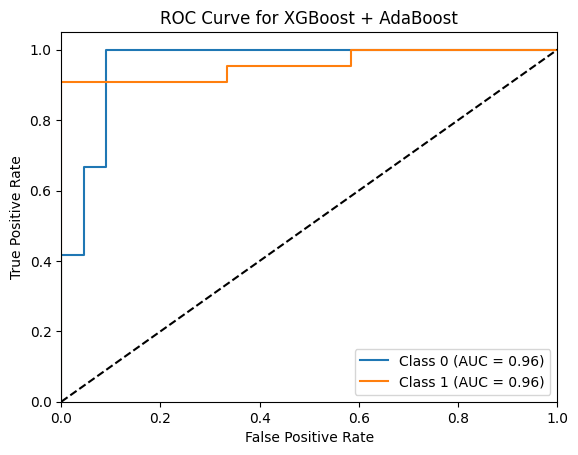

Classifier: XGBoost + AdaBoost
Accuracy: 0.9117647058823529
Precision: 0.8928571428571428
Sensitivity (Recall): 0.8695652173913043
F1-Score: 0.9051162790697674
Specificity: 1.0
AUC: {0: 0.9583333333333333, 1: 0.9583333333333334}
---------------------------------------------------


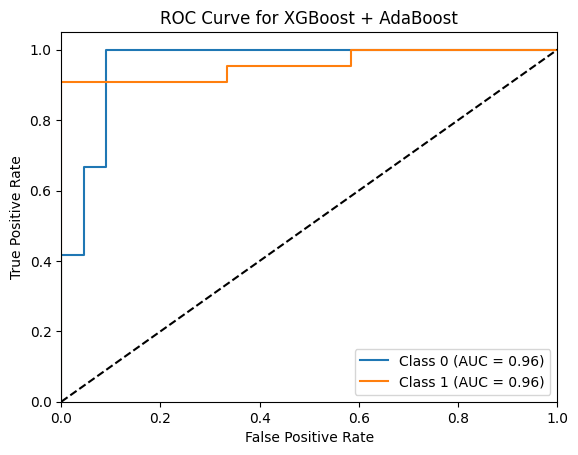

Classifier: XGBoost + AdaBoost
Accuracy: 0.9117647058823529
Precision: 0.8928571428571428
Sensitivity (Recall): 0.8695652173913043
F1-Score: 0.9051162790697674
Specificity: 1.0
AUC: {0: 0.9583333333333333, 1: 0.9583333333333334}
---------------------------------------------------


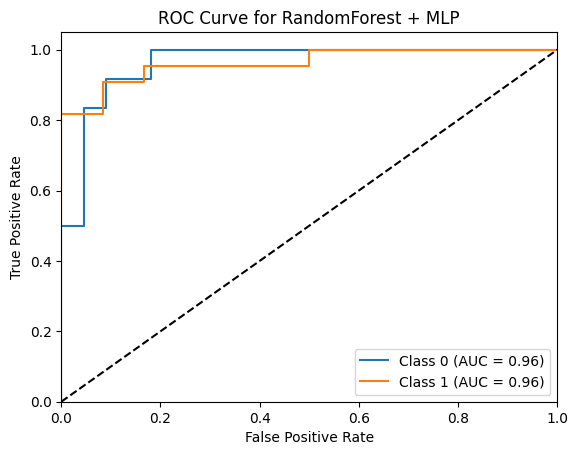

Classifier: RandomForest + MLP
Accuracy: 0.9117647058823529
Precision: 0.8928571428571428
Sensitivity (Recall): 0.8695652173913043
F1-Score: 0.9051162790697674
Specificity: 1.0
AUC: {0: 0.962121212121212, 1: 0.9621212121212122}
---------------------------------------------------


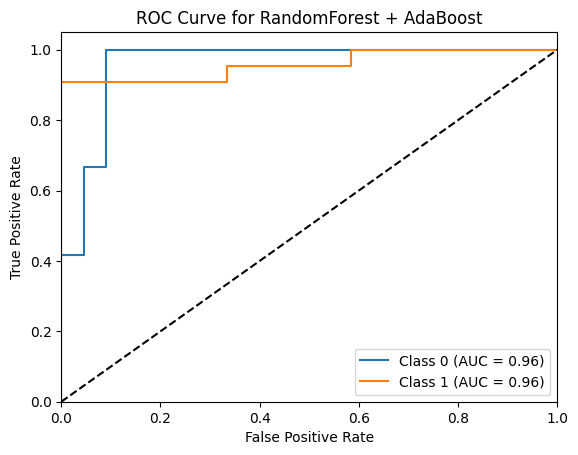

Classifier: RandomForest + AdaBoost
Accuracy: 0.9117647058823529
Precision: 0.8928571428571428
Sensitivity (Recall): 0.8695652173913043
F1-Score: 0.9051162790697674
Specificity: 1.0
AUC: {0: 0.9583333333333333, 1: 0.9583333333333334}
---------------------------------------------------


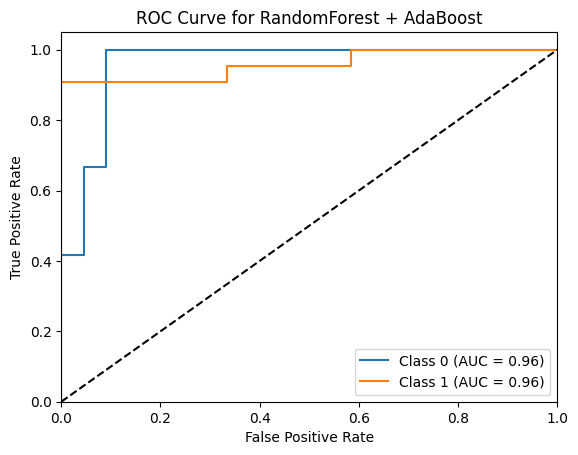

Classifier: RandomForest + AdaBoost
Accuracy: 0.9117647058823529
Precision: 0.8928571428571428
Sensitivity (Recall): 0.8695652173913043
F1-Score: 0.9051162790697674
Specificity: 1.0
AUC: {0: 0.9583333333333333, 1: 0.9583333333333334}
---------------------------------------------------


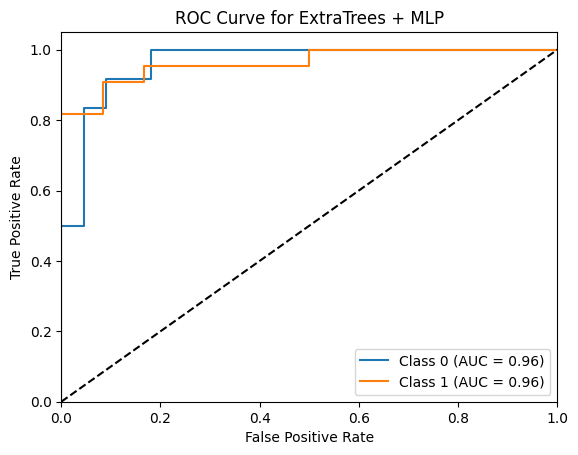

Classifier: ExtraTrees + MLP
Accuracy: 0.9117647058823529
Precision: 0.8928571428571428
Sensitivity (Recall): 0.8695652173913043
F1-Score: 0.9051162790697674
Specificity: 1.0
AUC: {0: 0.962121212121212, 1: 0.9621212121212122}
---------------------------------------------------


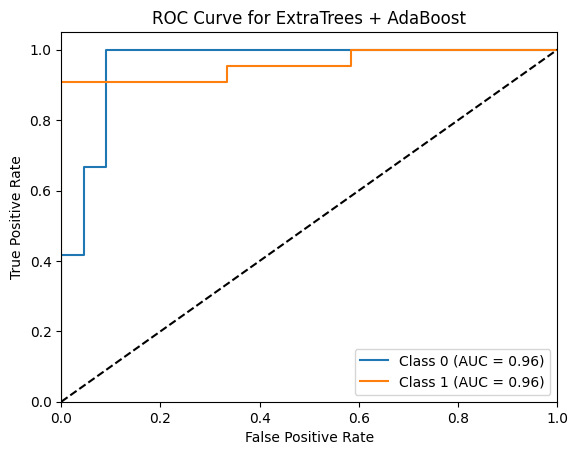

Classifier: ExtraTrees + AdaBoost
Accuracy: 0.9117647058823529
Precision: 0.8928571428571428
Sensitivity (Recall): 0.8695652173913043
F1-Score: 0.9051162790697674
Specificity: 1.0
AUC: {0: 0.9583333333333333, 1: 0.9583333333333334}
---------------------------------------------------


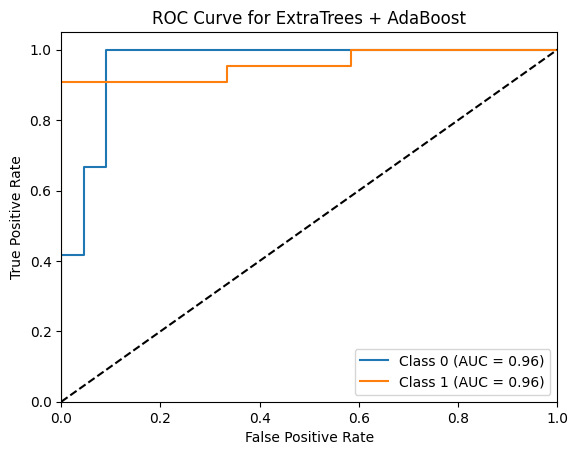

Classifier: ExtraTrees + AdaBoost
Accuracy: 0.9117647058823529
Precision: 0.8928571428571428
Sensitivity (Recall): 0.8695652173913043
F1-Score: 0.9051162790697674
Specificity: 1.0
AUC: {0: 0.9583333333333333, 1: 0.9583333333333334}
---------------------------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Load the dataset (you can replace this with your dataset)
# Load the dataset (you can replace this with your dataset)
start_time = time.time()
X = All_.iloc[:, :-1]
y = All_.iloc[:,-1]
#oversampling the data using smt
smt = SMOTE(random_state=42)

#splitting the data and resampling them
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, y_train)


# Binarize the labels
# y_bin = label_binarize(y, classes=[0, 1])
# n_classes = np.array(y).shape[1]
y=np.array(y)
y_shape = y
n_classes  = y_shape[1]

# Define feature selection classifiers
feature_selectors = [
    ("XGBoost", XGBClassifier(n_estimators=100, random_state=42)),
    ("RandomForest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("ExtraTrees", ExtraTreesClassifier(n_estimators=100, random_state=42))
]


# Define classification algorithms
classifiers = [
    ("MLP", MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=50, random_state=42)),
     ("AdaBoost", AdaBoostClassifier(n_estimators=50, random_state=42))
]



# Create ROC curve plots for each combination of feature selector and classifier
for selector_name, fs_classifier in feature_selectors:
  for classifier_name, classifier in classifiers:
    # Fit feature selector on the training data
    fs_classifier.fit(X_train_sm, Y_train_sm)

    # Get selected features using the classifier's feature importances
    feature_mask = feature_importance_df[feature_importance_df['Importance'] >= 0.06]
    selected_features_ = feature_mask['Feature']
    selected_features =  X_train.loc[:,selected_features_ ]
    selected_features_test =  X_test.loc[:,selected_features_ ]

    # selected_features = X_train_sm[:, fs_classifier.feature_importances_.argsort()[::-1][:num_features]]
    # selected_features_test = X_test[:, fs_classifier.feature_importances_.argsort()[::-1][:num_features]]

    classifier.fit(selected_features, y_train)


    # Calculate ROC curve and AUC
    n_classes = len(np.unique(Y_train_sm))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        # Retrieve target values for the class
        y_true_class = (y_test == i)

        # Calculate ROC curve and AUC for the class
        fpr[i], tpr[i], _ = roc_curve(y_true_class,  classifier.predict_proba(selected_features_test)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

#     # Rest of your code to plot ROC curves and compute metrics


    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {selector_name} + {classifier_name}')
    plt.legend(loc="lower right")
    plt.show()

    # ... Calculate other metrics (accuracy, precision, recall, etc.) ...

    # Print the computed metrics
    print(f"Classifier: {selector_name} + {classifier_name}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Sensitivity (Recall):", sensitivity)
    print("F1-Score:", f1)
    print("Specificity:", specificity)
    print("AUC:", roc_auc)
    print("---------------------------------------------------")



MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)


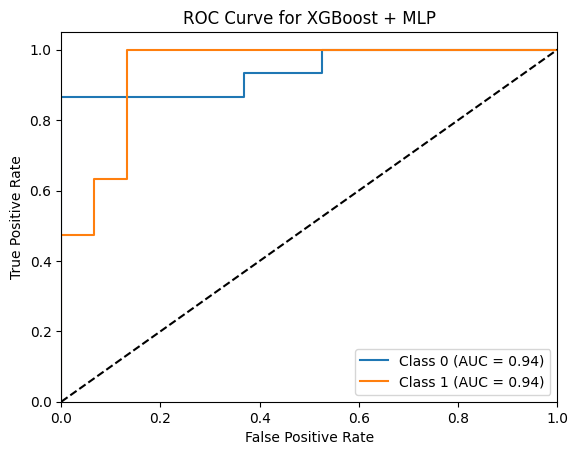

Classifier: XGBoost + MLP
Accuracy: 0.9117647058823529
Precision: 0.8928571428571428
Sensitivity (Recall): 0.8695652173913043
F1-Score: 0.9051162790697674
Specificity: 1.0
AUC: {0: 0.9403508771929825, 1: 0.9403508771929825}
---------------------------------------------------


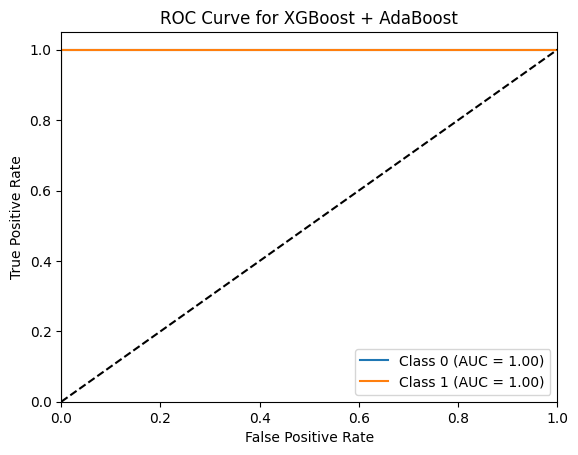

Classifier: XGBoost + AdaBoost
Accuracy: 0.9117647058823529
Precision: 0.8928571428571428
Sensitivity (Recall): 0.8695652173913043
F1-Score: 0.9051162790697674
Specificity: 1.0
AUC: {0: 1.0, 1: 1.0}
---------------------------------------------------


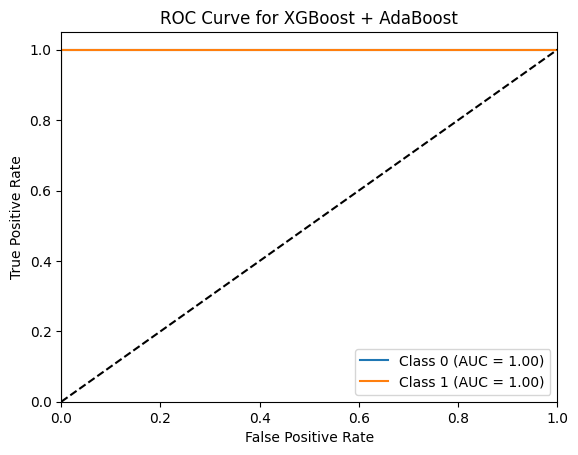

Classifier: XGBoost + AdaBoost
Accuracy: 0.9117647058823529
Precision: 0.8928571428571428
Sensitivity (Recall): 0.8695652173913043
F1-Score: 0.9051162790697674
Specificity: 1.0
AUC: {0: 1.0, 1: 1.0}
---------------------------------------------------


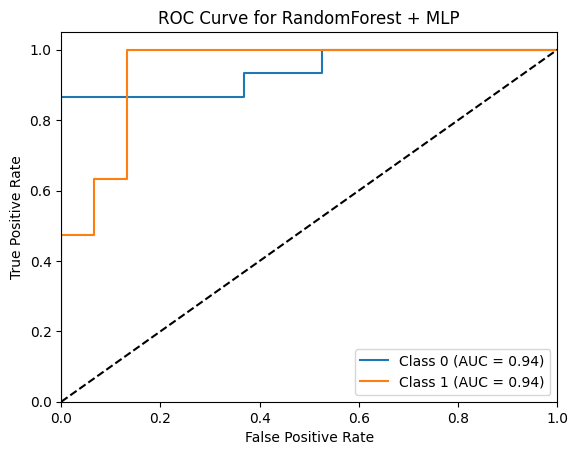

Classifier: RandomForest + MLP
Accuracy: 0.9117647058823529
Precision: 0.8928571428571428
Sensitivity (Recall): 0.8695652173913043
F1-Score: 0.9051162790697674
Specificity: 1.0
AUC: {0: 0.9403508771929825, 1: 0.9403508771929825}
---------------------------------------------------


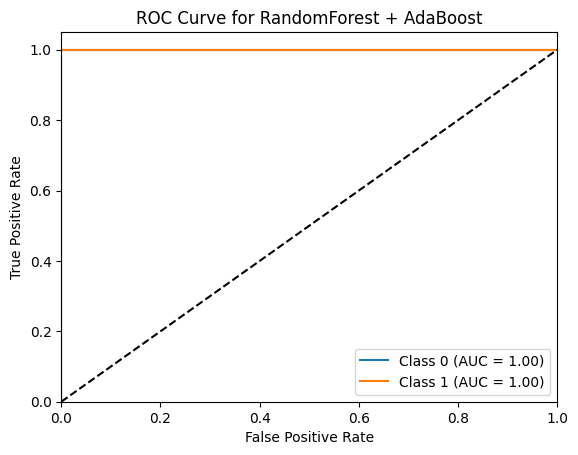

Classifier: RandomForest + AdaBoost
Accuracy: 0.9117647058823529
Precision: 0.8928571428571428
Sensitivity (Recall): 0.8695652173913043
F1-Score: 0.9051162790697674
Specificity: 1.0
AUC: {0: 1.0, 1: 1.0}
---------------------------------------------------


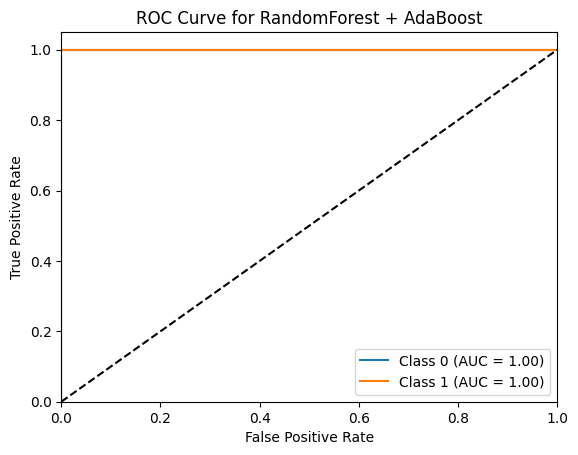

Classifier: RandomForest + AdaBoost
Accuracy: 0.9117647058823529
Precision: 0.8928571428571428
Sensitivity (Recall): 0.8695652173913043
F1-Score: 0.9051162790697674
Specificity: 1.0
AUC: {0: 1.0, 1: 1.0}
---------------------------------------------------


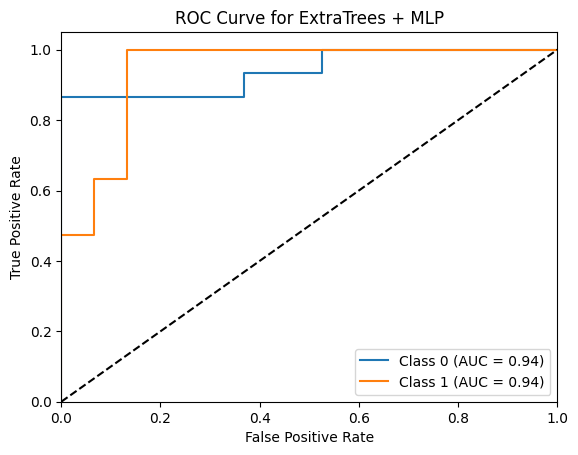

Classifier: ExtraTrees + MLP
Accuracy: 0.9117647058823529
Precision: 0.8928571428571428
Sensitivity (Recall): 0.8695652173913043
F1-Score: 0.9051162790697674
Specificity: 1.0
AUC: {0: 0.9403508771929825, 1: 0.9403508771929825}
---------------------------------------------------


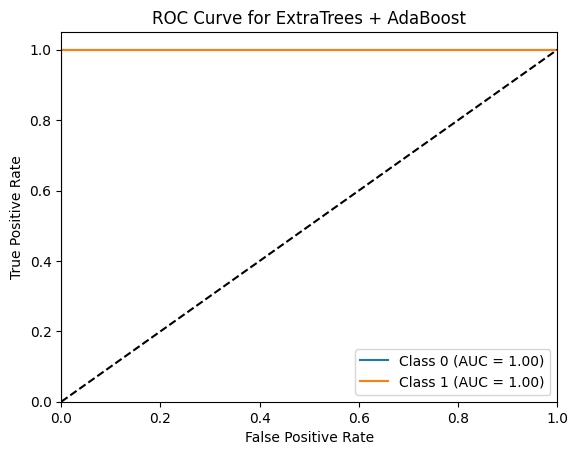

Classifier: ExtraTrees + AdaBoost
Accuracy: 0.9117647058823529
Precision: 0.8928571428571428
Sensitivity (Recall): 0.8695652173913043
F1-Score: 0.9051162790697674
Specificity: 1.0
AUC: {0: 1.0, 1: 1.0}
---------------------------------------------------


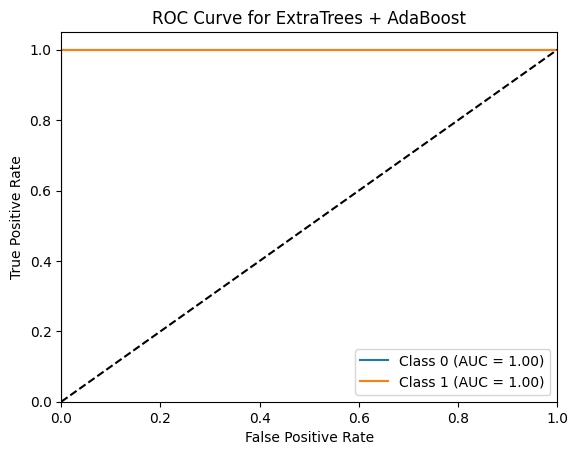

Classifier: ExtraTrees + AdaBoost
Accuracy: 0.9117647058823529
Precision: 0.8928571428571428
Sensitivity (Recall): 0.8695652173913043
F1-Score: 0.9051162790697674
Specificity: 1.0
AUC: {0: 1.0, 1: 1.0}
---------------------------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Load the dataset (you can replace this with your dataset)
# Load the dataset (you can replace this with your dataset)
start_time = time.time()
X = All_.iloc[:, :-1]
y = All_.iloc[:,-1]
#oversampling the data using smt
smt = SMOTE(random_state=42)

#splitting the data and resampling them
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, y_train)


# Binarize the labels
# y_bin = label_binarize(y, classes=[0, 1])
# n_classes = np.array(y).shape[1]
y=np.array(y)
y_shape = y
n_classes  = y_shape[1]

# Define feature selection classifiers
feature_selectors = [
    ("XGBoost", XGBClassifier(n_estimators=100, random_state=42)),
    ("RandomForest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("ExtraTrees", ExtraTreesClassifier(n_estimators=100, random_state=42))
]


# Define classification algorithms
classifiers = [
    ("MLP", MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=50, random_state=42)),
     ("AdaBoost", AdaBoostClassifier(n_estimators=50, random_state=42))
]

print(classifiers[0][1])

# Create ROC curve plots for each combination of feature selector and classifier
for selector_name, fs_classifier in feature_selectors:
  for classifier_name, classifier in classifiers:
    # Fit feature selector on the training data
    fs_classifier.fit(X_train_sm, Y_train_sm)

    # Get selected features using the classifier's feature importances
    feature_mask = feature_importance_df[feature_importance_df['Importance'] >= 0.06]
    selected_features_ = feature_mask['Feature']
    selected_features =  X_train.loc[:,selected_features_ ]
    selected_features_test =  X_test.loc[:,selected_features_ ]


    # selected_features = X_train_sm[:, fs_classifier.feature_importances_.argsort()[::-1][:num_features]]
    # selected_features_test = X_test[:, fs_classifier.feature_importances_.argsort()[::-1][:num_features]]

    classifier.fit(selected_features, y_train)


    # Calculate ROC curve and AUC
    n_classes = len(np.unique(Y_train_sm))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        # Retrieve target values for the class
        y_true_class = (y_test == i)

        # Calculate ROC curve and AUC for the class
        fpr[i], tpr[i], _ = roc_curve(y_true_class,  classifier.predict_proba(selected_features_test)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

#     # Rest of your code to plot ROC curves and compute metrics


    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {selector_name} + {classifier_name}')
    plt.legend(loc="lower right")
    plt.show()

    # ... Calculate other metrics (accuracy, precision, recall, etc.) ...

    # Print the computed metrics
    print(f"Classifier: {selector_name} + {classifier_name}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Sensitivity (Recall):", sensitivity)
    print("F1-Score:", f1)
    print("Specificity:", specificity)
    print("AUC:", roc_auc)
    print("---------------------------------------------------")


Use K-NN means algorithm to perform experimentation of patients with DM

In [ ]:

print(DM.head())

   ET_ALL Right  ALL Mean Right  ALL Mean Squared STD Right  \
0         31.64       25.351164                  180.907898   
1         26.80       19.081112                  152.195880   
2         27.13       21.129945                  146.891773   
3         31.53       22.660763                  219.319292   
4         32.36       24.524480                  209.181919   

   ALL Average STD Right  ALL Overall STD Right  MCA Mean Squared STD Right  \
0              13.450201              13.450201                   95.301183   
1              12.336769              12.336769                  106.534461   
2              12.119892              12.119892                   57.894458   
3              14.809433              14.809433                  107.033206   
4              14.463123              14.463123                   81.124952   

   MCA Average STD Right  MCA Overall STD Right  LCA Average STD Right  \
0               9.762232               9.762232               8.603702  